<a href="https://colab.research.google.com/github/prgmr99/machine_learning-sklearn/blob/main/sklearn_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble**

머신러닝 앙상블이란 **여러 개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법**이다.
(여러 모델을 이용하여 데이터를 학습하고, 모든 모델의 예측 결과를 평균하여 예측)

**앙상블 기법의 종류**

* 보팅(Voting): 투표를 통해 결과 도출
* 배깅(Bagging): 샘플 중복 생성을 통해 결과 도출
* 부스팅(Boosting): 이전 오차를 보완하면서 가중치 부여
* 스태킹(Stacking): 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번 예측


# **0. 데이터 셋**

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

np.set_printoptions(suppress=True)
# If True, print floating point numbers instead of scientific notation

In [2]:
from sklearn.datasets import load_boston

### **0-1. 데이터 로드**

In [3]:
data=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### **0-2. 데이터프레임 만들기**

In [5]:
df=pd.DataFrame(data['data'],columns=data['feature_names'])
df['MEDV']=data['target']

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# **1. Training set/Test set 나누기**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('MEDV',1),df['MEDV'],random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [9]:
x_train.shape, y_train.shape

((379, 13), (379,))

In [10]:
x_test.shape, y_test.shape

((127, 13), (127,))

# **2. 평가 지표 만들기**

### **2-1. 평가 지표**


(1) MAE

(2) MSE

(3) RMSE

### **2-2. 모델 성능 확인을 위한 함수**

In [11]:
# sklearn 평가지표 활용
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# prediction plot
def plot_predictions(name_, actual, pred):
    df = pd.DataFrame({'actual': y_test, 'prediction': pred})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

# evaluation plot
def mse_eval(name_, actual, pred):
    global predictions
    global colors

    plot_predictions(name_, actual, pred)

    mse = mean_squared_error(actual, pred)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

# remove model
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True


# coefficients visulization
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

# **3. 단일 회귀 모델(이전 포스팅)**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

### **[1] Linear Regression**

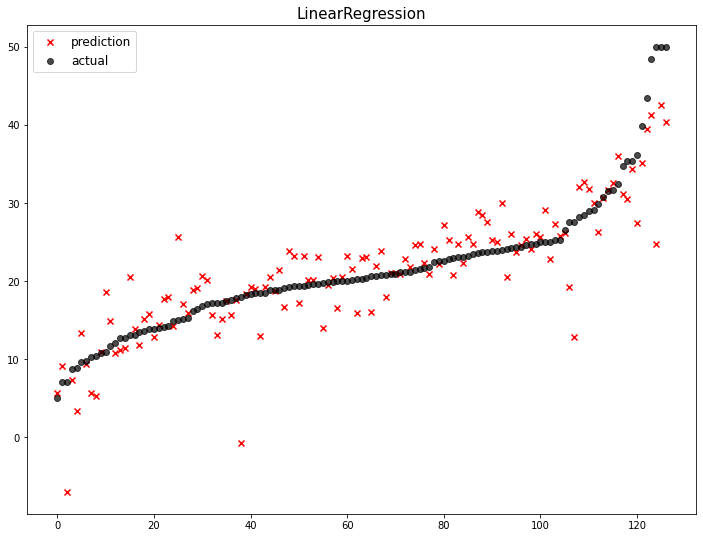

              model        mse
0  LinearRegression  22.098695


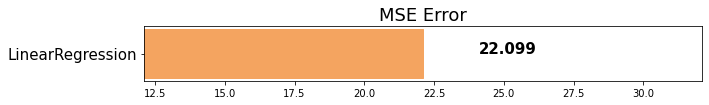

In [14]:
linear_reg=LinearRegression(n_jobs=-1)
linear_reg.fit(x_train,y_train)
linear_pred=linear_reg.predict(x_test)
mse_eval('LinearRegression',y_test,linear_pred)

### **[2] Ridge**

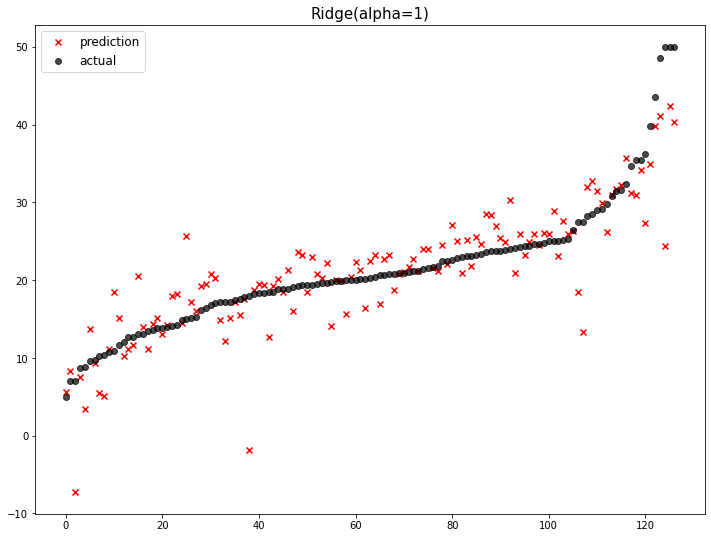

              model        mse
0    Ridge(alpha=1)  22.480476
1  LinearRegression  22.098695


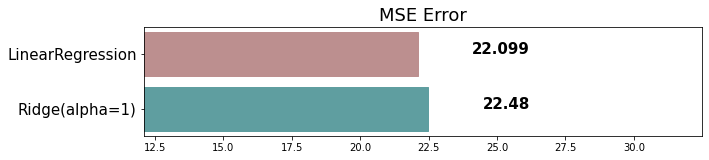

In [15]:
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)
mse_eval('Ridge(alpha=1)',y_test,ridge_pred)

### **[3] LASSO**

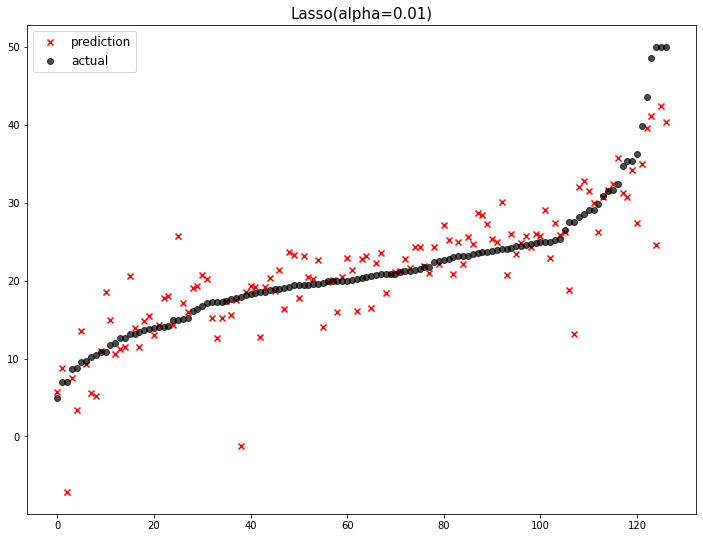

               model        mse
0     Ridge(alpha=1)  22.480476
1  Lasso(alpha=0.01)  22.210557
2   LinearRegression  22.098695


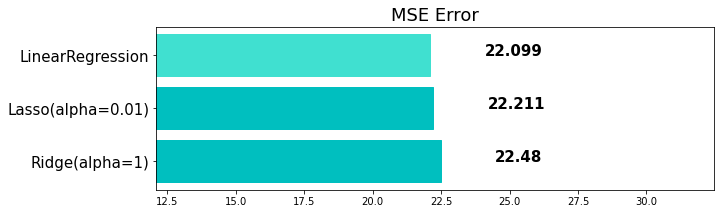

In [16]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)
mse_eval("Lasso(alpha=0.01)",y_test,lasso_pred)

### **[4] ElasticNet**

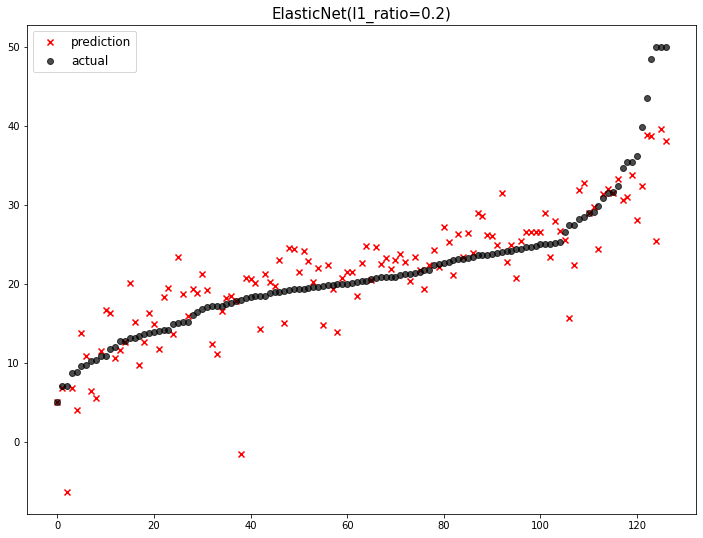

                      model        mse
0  ElasticNet(l1_ratio=0.2)  23.095135
1            Ridge(alpha=1)  22.480476
2         Lasso(alpha=0.01)  22.210557
3          LinearRegression  22.098695


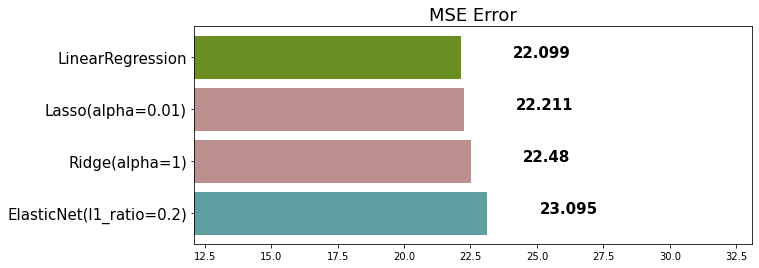

In [17]:
elasticnet=ElasticNet(alpha=0.5, l1_ratio=0.2)
elasticnet.fit(x_train,y_train)
elasticnet_pred=elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.2)',y_test,elasticnet_pred)

### **[5] With Standard Scaling**

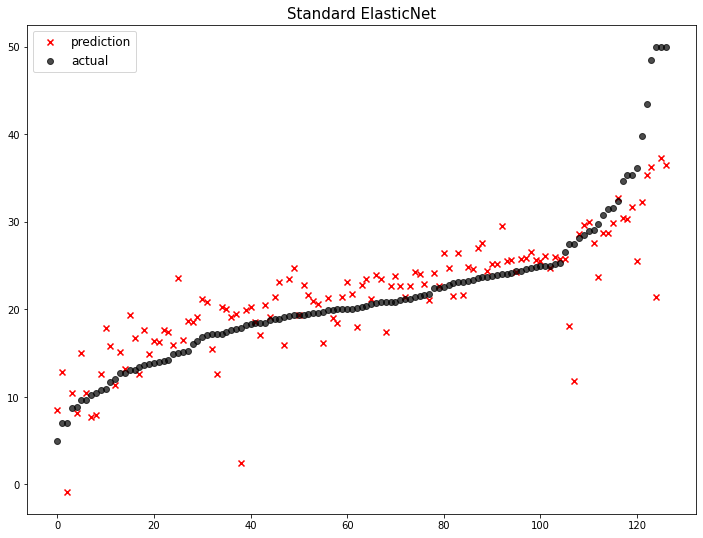

                      model        mse
0       Standard ElasticNet  24.364212
1  ElasticNet(l1_ratio=0.2)  23.095135
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695


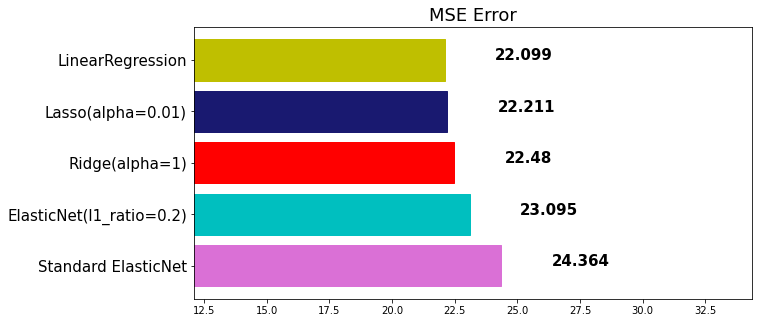

In [18]:
standard_elasticnet=make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.5, l1_ratio=0.2)
)

elas_scaled_pred=standard_elasticnet.fit(x_train,y_train).predict(x_test)
mse_eval('Standard ElasticNet',y_test,elas_scaled_pred)

### **[6] Polynomial Features**

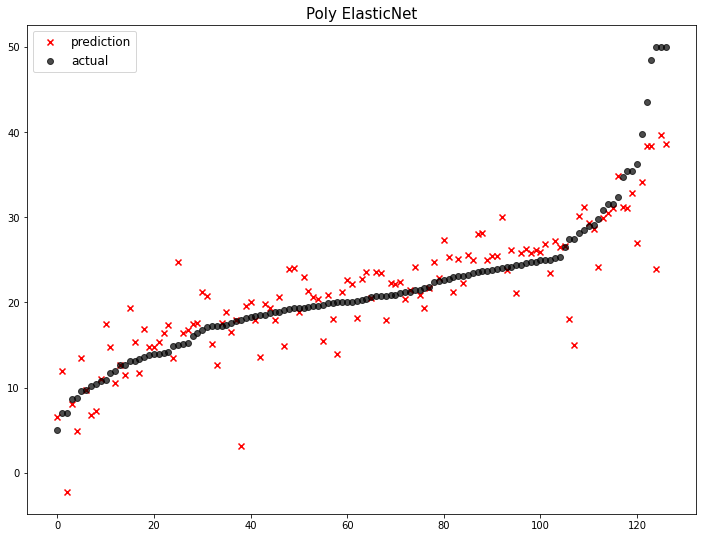

                      model        mse
0       Standard ElasticNet  24.364212
1  ElasticNet(l1_ratio=0.2)  23.095135
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           Poly ElasticNet  20.413444


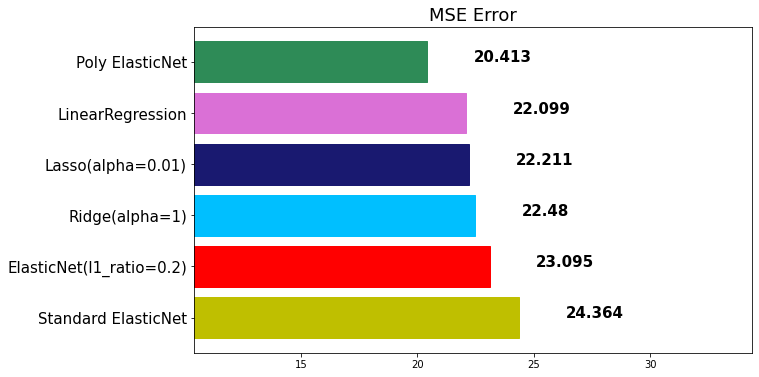

In [19]:
# 2-Degree Polynomial Features + Standard Scaling
poly_elasticnet=make_pipeline(
    PolynomialFeatures(degree=2,include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.5,l1_ratio=0.2)
)

poly_pred=poly_elasticnet.fit(x_train,y_train).predict(x_test)
mse_eval('Poly ElasticNet',y_test,poly_pred)

# **4. 앙상블(Ensemble) 알고리즘**

## **4-1. 보팅(Voting) 알고리즘**
### 회귀(Regression)

Voting은 단어 뜻 그대로 **투표를 통해 최종 결과를 결정하는 방식**이다. Voting와 Bagging은 모두 투표방식이지만, 다음과 같은 큰 차이점이 있다.

* Voting은 다른 알고리즘 model을 조합해서 사용한다.
* Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용한다.

In [20]:
from sklearn.ensemble import VotingRegressor

In [21]:
# 보팅에 참여한 single models 지정
single_models =[
      ('linear_reg',linear_reg),
      ('ridge',ridge),
      ('lasso',lasso),
      ('elasticnet',elasticnet),
      ('standard_elasticnet',standard_elasticnet),
      ('poly_elasticnet',poly_elasticnet)
]

In [22]:
# voting regressor 만들기
voting_regressor=VotingRegressor(single_models, n_jobs=-1)

In [23]:
voting_regressor.fit(x_train,y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet', ElasticNet(alpha=0.5, l1_ratio=0.2)),
                            ('standard_elasticnet',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.5,
                                                         l1_ratio=0.2))])),
                            ('poly_elasticnet',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                

In [24]:
voting_pred=voting_regressor.predict(x_test)

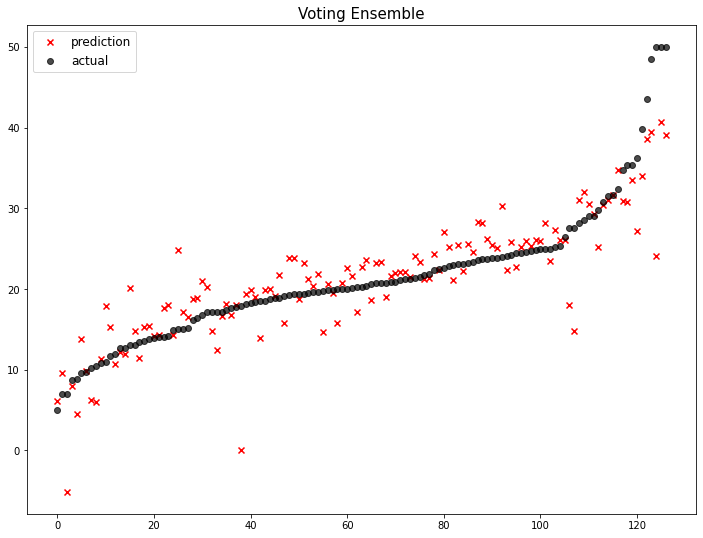

                      model        mse
0       Standard ElasticNet  24.364212
1  ElasticNet(l1_ratio=0.2)  23.095135
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           Voting Ensemble  21.338016
6           Poly ElasticNet  20.413444


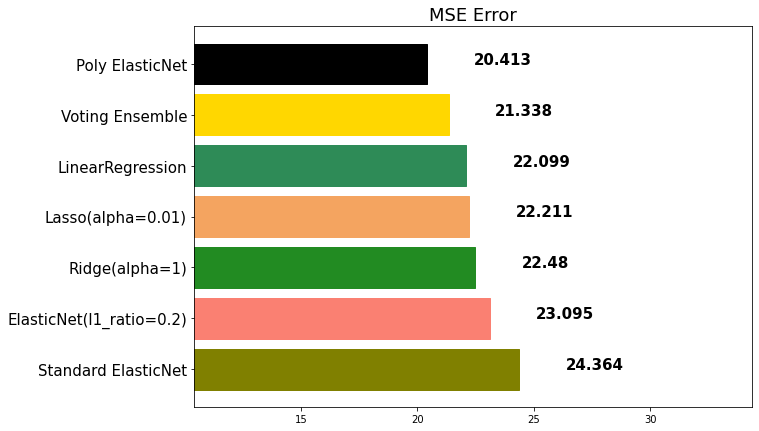

In [25]:
mse_eval('Voting Ensemble',y_test,voting_pred)

### 분류(Classification)

분류기 모델을 만들 때, Voting 앙상블은 1가지의 중요한 parameter가 있다.

    *  voting={'hard', 'soft'}
  
class를 0,1로 분류 예측을 하는 이진 분류를 예로 들어보자.

**1) hard로 설정한 경우**

Hard voting 방식에서는 결과값에 대한 다수 class를 사용한다.

  * 분류를 예측한 값이 1,0,0,1,1이었다고 가정한다면 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식에서는 1이 최종값으로 예측하게 된다.


**2) soft로 설정한 경우**

Soft voting 방식은 각각의 확률의 평균값을 계산한 다음에 가장 확률이 높은 값으로 확정짓게 된다.

  * class 0이 나올 확률이 (0.4,0.9,0.9,0.4,0.4)이었고, class 1이 나올 확률이 (0.6,0.1,0.1,0.6,0.6)이었다면, 
      * class 0이 나올 최종 확률은 (0.4+0.9+0.9+0.4+0.4)/5=0.44
      * class 1이 나올 최종 확률은 (0.6+0.1+0.1+0.6+0.6)/5=0.4

앞의 hard voting의 결과와는 다른 결과값이 최종으로 선출되게 된다.

In [26]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [27]:
models=[
        ('Logit',LogisticRegression()),
        ('ridge',RidgeClassifier())
]

In [28]:
vc=VotingClassifier(models,voting='soft')

## **4-2. 배깅(Bagging)**

Bagging은 **Bootstrap Aggregating**의 줄임말이다.

Bootstrap은 여러 개의 dataset을 중첩을 허용하게 하여 샘플링하여 분할하는 방식

데이터 셋의 구성이 [1,2,3,4,5]로 되어 있다면,
    1. group1 =[1,2,3]
    2. group2 =[1,3,4]
    3. group3 =[2,3,5]

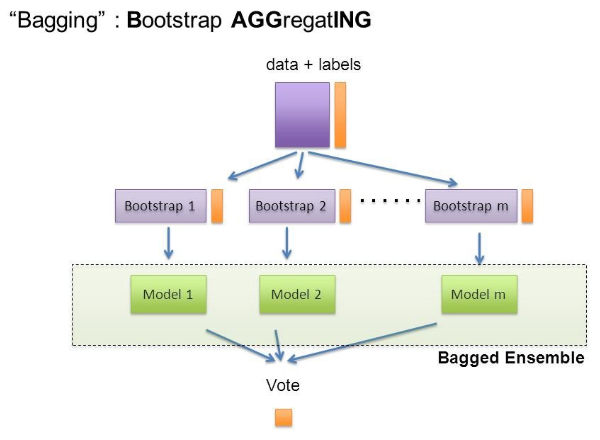

In [29]:
Image('https://teddylee777.github.io/images/2019-12-17/image-20191217015537872.png')

**Voting vs Bagging**

  * **Voting**은 여러 알고리즘의 조합에 대한 앙상블
  * **Bagging**은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블

**대표적인 Bagging 앙상블**
  * Random Forest
  * Bagging

### **Random Forest**
    * Decision Tree 기반 Bagging 앙상블
    * 굉장히 인기있는 앙상블 모델
    * 사용성이 쉽고, 성능도 우수함

**Hyper-parameter의 default value로 모델 학습**

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rfr=RandomForestRegressor(random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

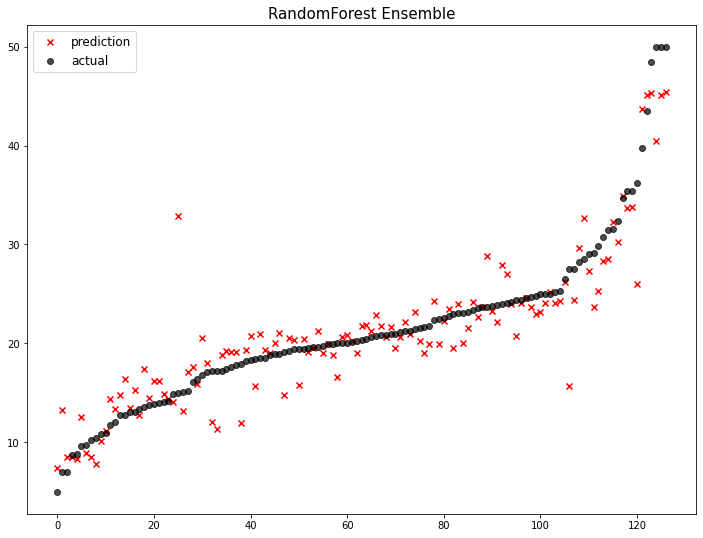

                      model        mse
0       Standard ElasticNet  24.364212
1  ElasticNet(l1_ratio=0.2)  23.095135
2            Ridge(alpha=1)  22.480476
3         Lasso(alpha=0.01)  22.210557
4          LinearRegression  22.098695
5           Voting Ensemble  21.338016
6           Poly ElasticNet  20.413444
7     RandomForest Ensemble  10.374372


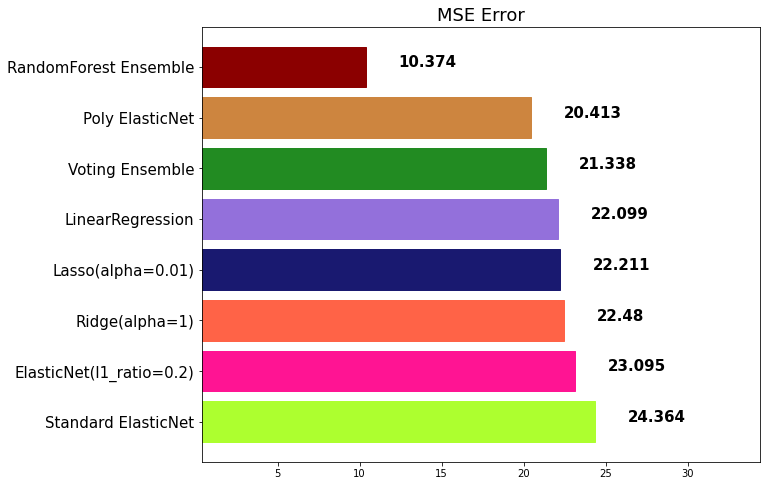

In [32]:
rfr_pred=rfr.predict(x_test)
mse_eval('RandomForest Ensemble', y_test, rfr_pred)

**[주요 Hyper-parameter]**

    * random_state : random seed 고정값
    * n_jobs : CPU 사용 개수
    * max_depth : 깊어질 수 있는 최대 깊이. 과대적합 방지용
    * n_estimators : 앙상블하는 트리의 개수
    * max_features : best split을 판단할 때, 최대로 사용할 feature의 개수 {'auto','sqrt','log2'}. 과대적합 방지용
    * min_samples_split : 트리가 분할할 때, 최소 샘플의 개수. default=2. 과대적합 방지용

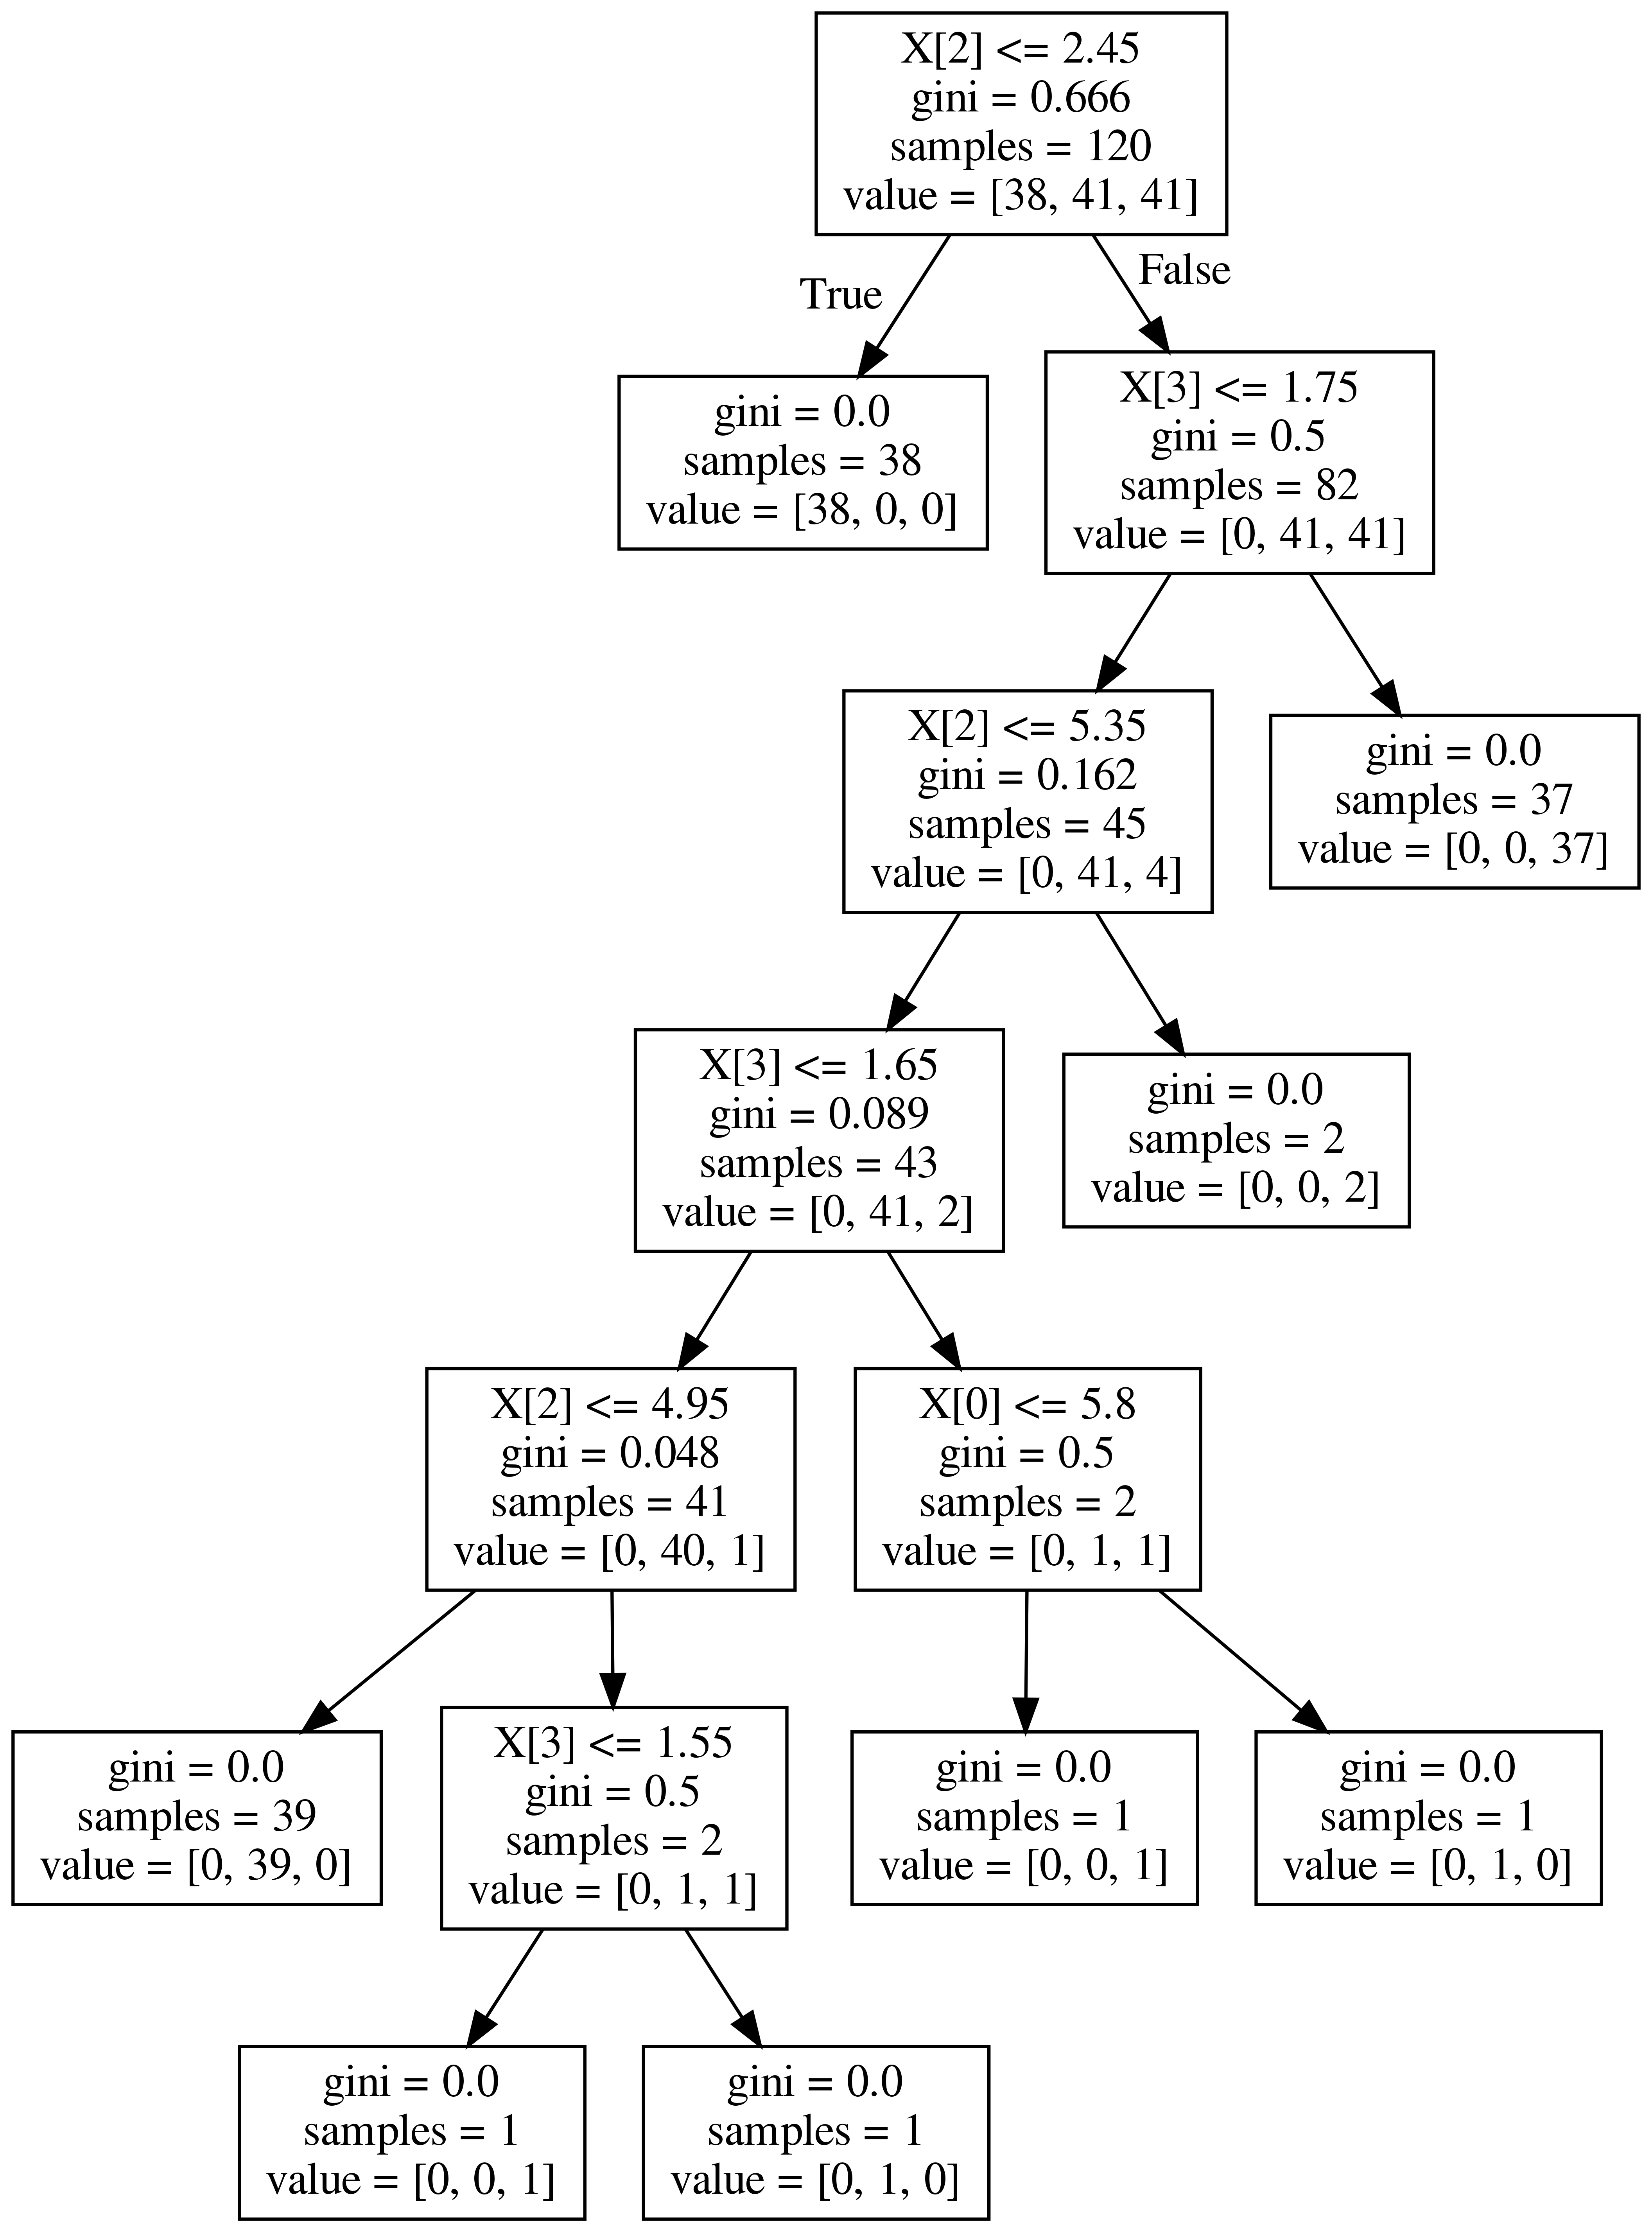

In [33]:
Image('https://teddylee777.github.io/images/2020-01-09/decistion-tree.png', width=600)

**With Hyper-parameter Tuning**

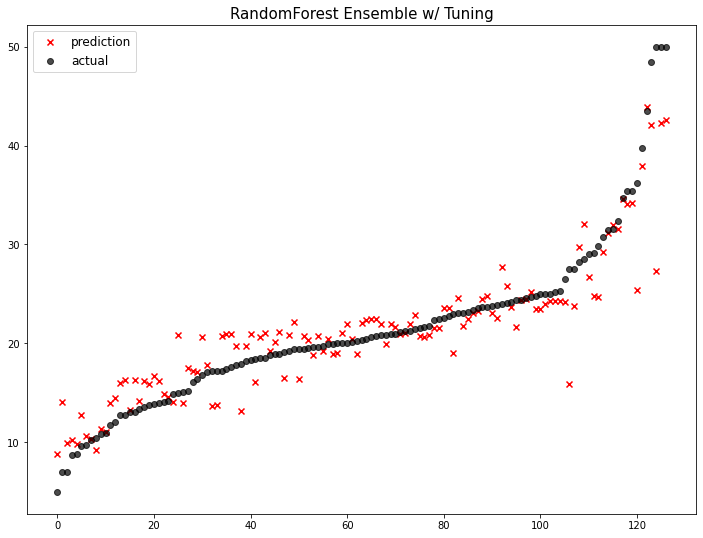

                             model        mse
0              Standard ElasticNet  24.364212
1         ElasticNet(l1_ratio=0.2)  23.095135
2                   Ridge(alpha=1)  22.480476
3                Lasso(alpha=0.01)  22.210557
4                 LinearRegression  22.098695
5                  Voting Ensemble  21.338016
6                  Poly ElasticNet  20.413444
7  RandomForest Ensemble w/ Tuning  11.636012
8            RandomForest Ensemble  10.374372


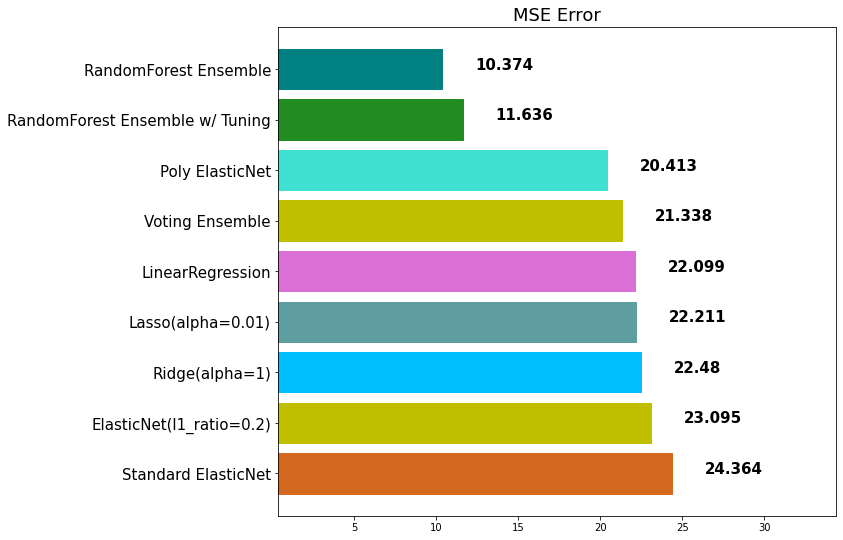

In [34]:
rfr_t=RandomForestRegressor(random_state=42,n_estimators=500,max_depth=7,max_features='sqrt')
rfr_t.fit(x_train,y_train)
rfr_t_pred=rfr_t.predict(x_test)
mse_eval('RandomForest Ensemble w/ Tuning', y_test, rfr_t_pred)

## **부스팅(Boosting)**

약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대해 잘못 예측된 데이터에 **가중치를 부여해 오차를 보완**해나가는 방식이다.

**[장점]**

  * 성능이 매우 우수하다 (LightGBM, XGBoost)

**[단점]**
  
  * 부스팅 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 **잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감**할 수 있다.

  * 다른 앙상블 대비 **학습 시간이 오래걸린다는 단점**이 존재

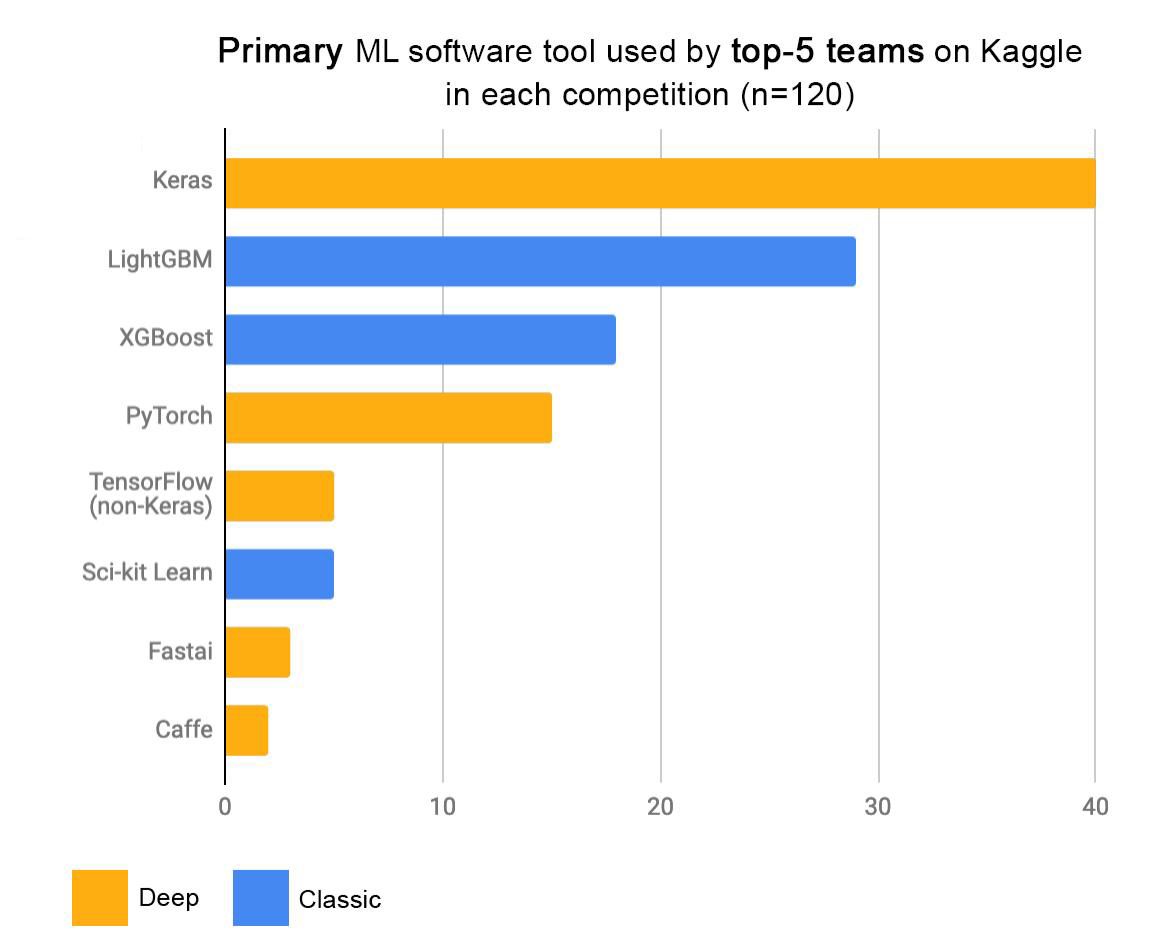

In [35]:
Image('https://keras.io/img/graph-kaggle-1.jpeg', width=800)

**대표적인 Boosting 앙상블**

  1. AdaBoost
  2. GradientBoost
  3. LightGBM(LGBM)
  4. XGBoost

### **4-3-1. Gradient Boost**

  * 장점: 성능이 우수함
  * 단점: 학습 시간이 너무 오래 걸린다.

In [36]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [37]:
# default value로 학습
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

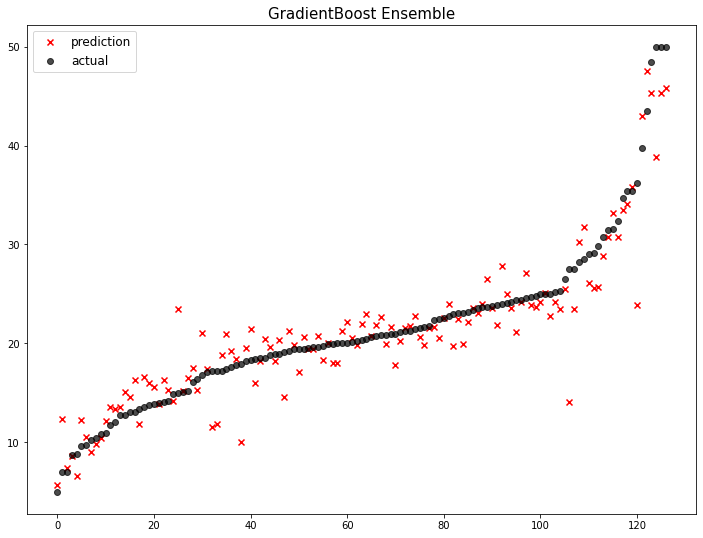

                             model        mse
0              Standard ElasticNet  24.364212
1         ElasticNet(l1_ratio=0.2)  23.095135
2                   Ridge(alpha=1)  22.480476
3                Lasso(alpha=0.01)  22.210557
4                 LinearRegression  22.098695
5                  Voting Ensemble  21.338016
6                  Poly ElasticNet  20.413444
7  RandomForest Ensemble w/ Tuning  11.636012
8            RandomForest Ensemble  10.374372
9           GradientBoost Ensemble   8.956141


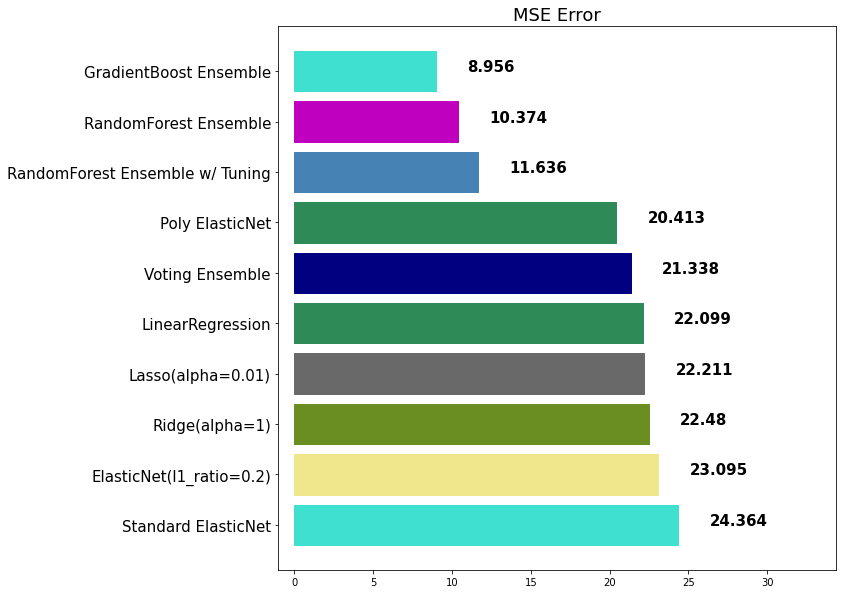

In [38]:
gbr_pred=gbr.predict(x_test)
mse_eval('GradientBoost Ensemble', y_test,gbr_pred)

**[주요 Hyper-parameter]**

  * **random_state:** random seed 고정값
  * **n_jobs:** CPU 사용 개수
  * **learning rate:** 학습률. 너무 큰 학습률은 성능을 떨어뜨리고, 너무 작은 학습률은 학습이 느리다. 적절한 값을 찾아야함. default=0.1 (n_estimators와 같이 튜닝해야 함.)
  * **n_estimators:** 부스팅 스테이지 수. default=100 (Random Forest 트리의 개수 설정과 비슷)
  * **subsample:** 샘플 사용 비율(max_features와 비슷). 과대적합 방지용
  * **min_samples_split:** 노드 분할시 최소 샘플의 개수. default=2. 과대적합 방지용

There's a trade-off between learning_rate and n_estimators.

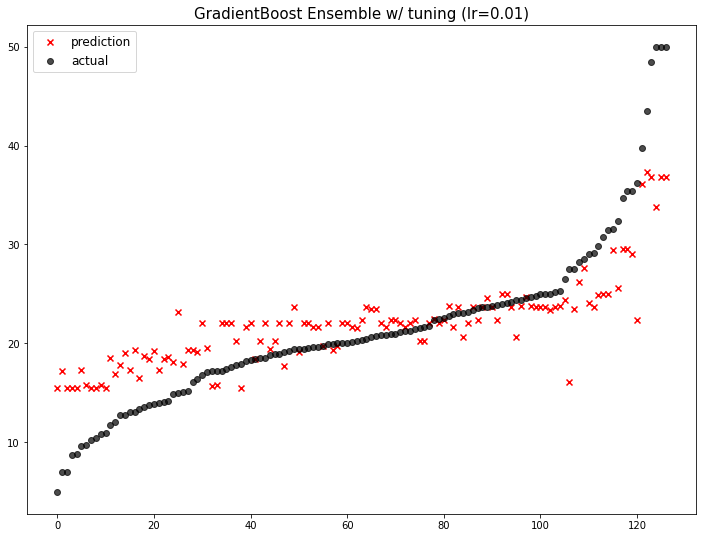

                                         model        mse
0                          Standard ElasticNet  24.364212
1                     ElasticNet(l1_ratio=0.2)  23.095135
2                               Ridge(alpha=1)  22.480476
3                            Lasso(alpha=0.01)  22.210557
4                             LinearRegression  22.098695
5   GradientBoost Ensemble w/ tuning (lr=0.01)  21.982151
6                              Voting Ensemble  21.338016
7                              Poly ElasticNet  20.413444
8              RandomForest Ensemble w/ Tuning  11.636012
9                        RandomForest Ensemble  10.374372
10                      GradientBoost Ensemble   8.956141


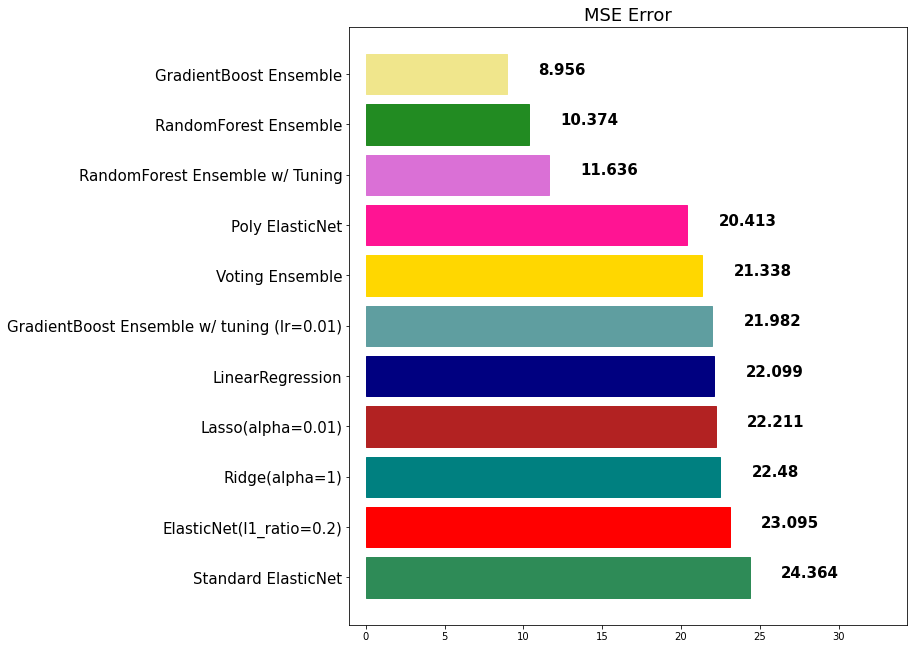

In [39]:
# with hyper-parameter tuning
# learning_rate=0.01 (without tuning n_estimators together)
gbr_t=GradientBoostingRegressor(random_state=42,learning_rate=0.01)
gbr_t.fit(x_train,y_train)
gbr_t_pred=gbr_t.predict(x_test)
mse_eval('GradientBoost Ensemble w/ tuning (lr=0.01)',y_test,gbr_t_pred)

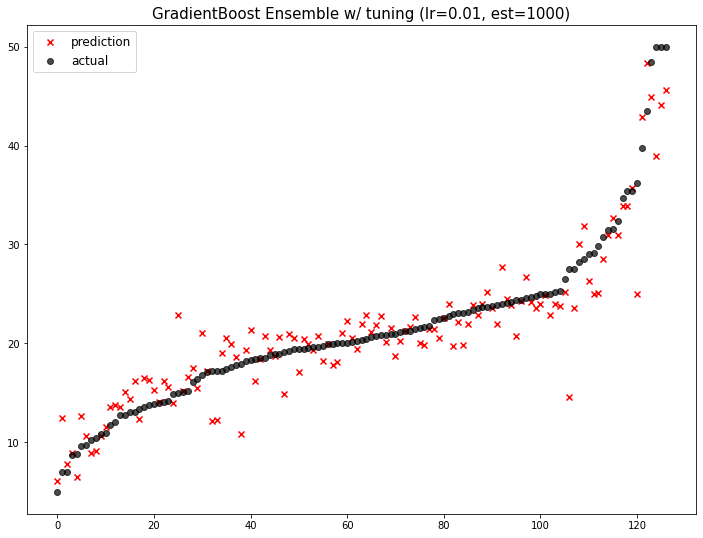

                                                model        mse
0                                 Standard ElasticNet  24.364212
1                            ElasticNet(l1_ratio=0.2)  23.095135
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5          GradientBoost Ensemble w/ tuning (lr=0.01)  21.982151
6                                     Voting Ensemble  21.338016
7                                     Poly ElasticNet  20.413444
8                     RandomForest Ensemble w/ Tuning  11.636012
9                               RandomForest Ensemble  10.374372
10                             GradientBoost Ensemble   8.956141
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...   8.546408


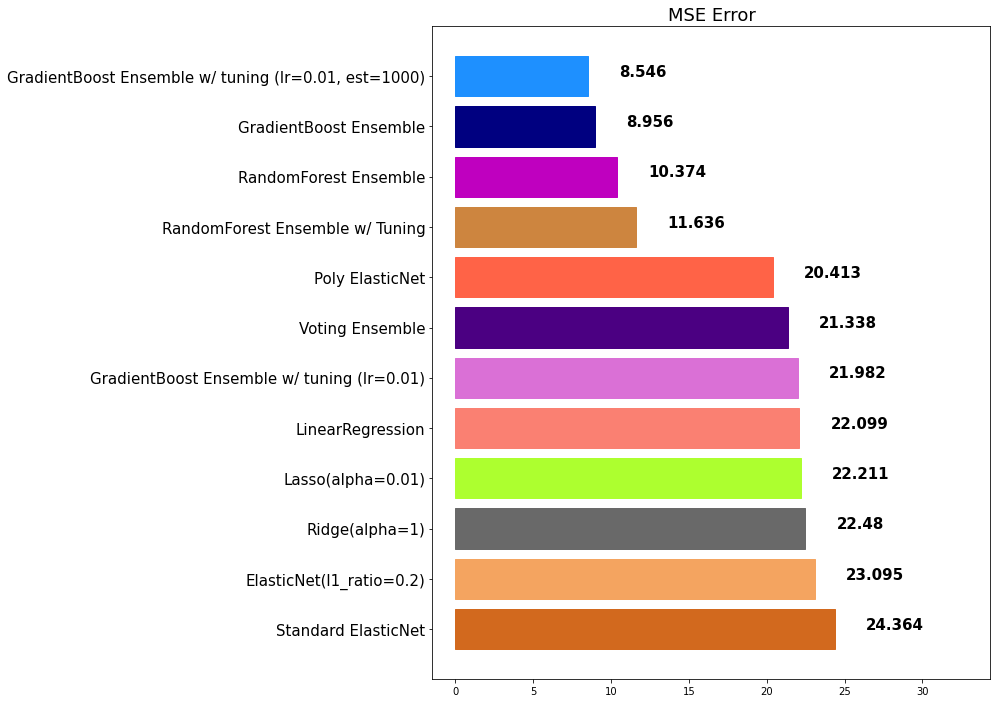

In [40]:
# tuning: learning_rate=0.01, n_extimators=1000
gbr_t2=GradientBoostingRegressor(random_state=42, learning_rate=0.01,n_estimators=1000)
gbr_t2.fit(x_train,y_train)
gbr_t2_pred=gbr_t2.predict(x_test)
mse_eval('GradientBoost Ensemble w/ tuning (lr=0.01, est=1000)', y_test, gbr_t2_pred)

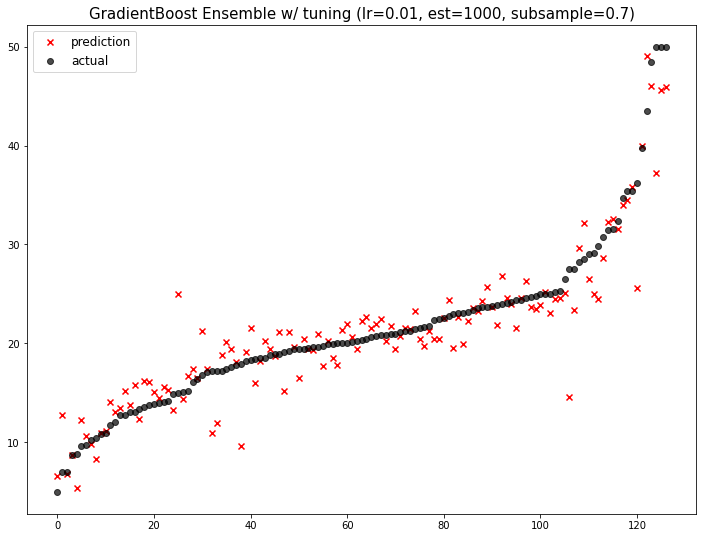

                                                model        mse
0                                 Standard ElasticNet  24.364212
1                            ElasticNet(l1_ratio=0.2)  23.095135
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5          GradientBoost Ensemble w/ tuning (lr=0.01)  21.982151
6                                     Voting Ensemble  21.338016
7                                     Poly ElasticNet  20.413444
8                     RandomForest Ensemble w/ Tuning  11.636012
9                               RandomForest Ensemble  10.374372
10  GradientBoost Ensemble w/ tuning (lr=0.01, est...   9.095856
11                             GradientBoost Ensemble   8.956141
12  GradientBoost Ensemble w/ tuning (lr=0.01, est...   8.546408


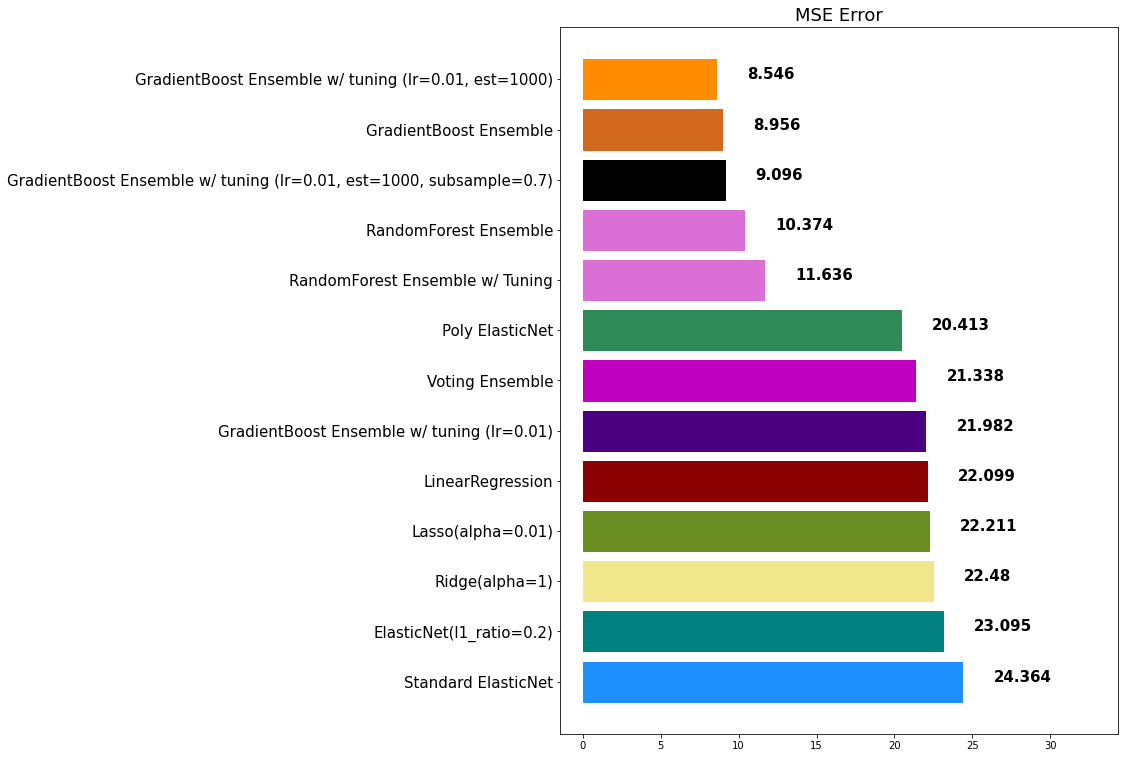

In [41]:
# tuning: learning_rate=0.01, n_estimatorts=1000, subsample=0.8
gbr_t3=GradientBoostingRegressor(random_state=42,learning_rate=0.01,n_estimators=1000,subsample=0.7)
gbr_t3.fit(x_train,y_train)
gbr_t3_pred=gbr_t3.predict(x_test)
mse_eval('GradientBoost Ensemble w/ tuning (lr=0.01, est=1000, subsample=0.7)', y_test, gbr_t3_pred)

### **4-3-2. XGBoost**

**주요 특징**

    * scikit-learn 패키지 아님
    * 성능이 우수함
    * GBM보다는 빠르고 성능도 향상됨
    * 여전히 학습 속도가 느림

In [42]:
pip install xgboost

In [43]:
from xgboost import XGBRegressor, XGBClassifier

In [44]:
# default value로 학습
xgb=XGBRegressor(random_state=42)
xgb.fit(x_train,y_train)

[02:11:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=42)

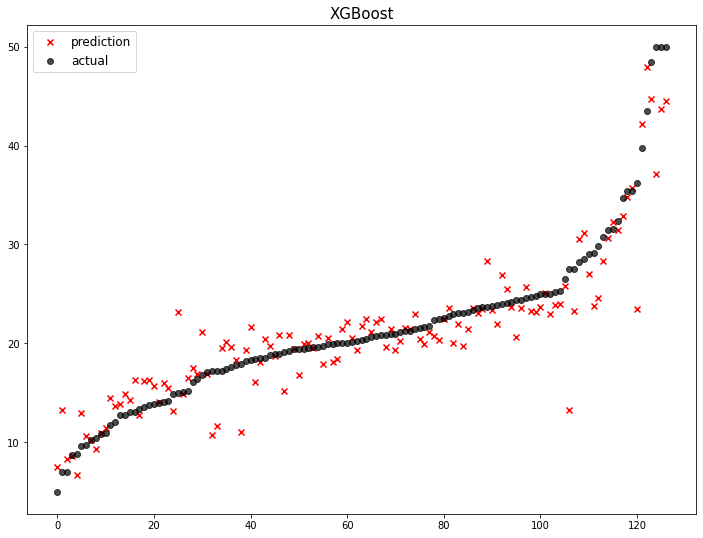

                                                model        mse
0                                 Standard ElasticNet  24.364212
1                            ElasticNet(l1_ratio=0.2)  23.095135
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5          GradientBoost Ensemble w/ tuning (lr=0.01)  21.982151
6                                     Voting Ensemble  21.338016
7                                     Poly ElasticNet  20.413444
8                     RandomForest Ensemble w/ Tuning  11.636012
9                               RandomForest Ensemble  10.374372
10                                            XGBoost  10.118980
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...   9.095856
12                             GradientBoost Ensemble   8.956141
13  GradientBoost Ensemble w/ tuning (lr=0.01, est...   8.546408


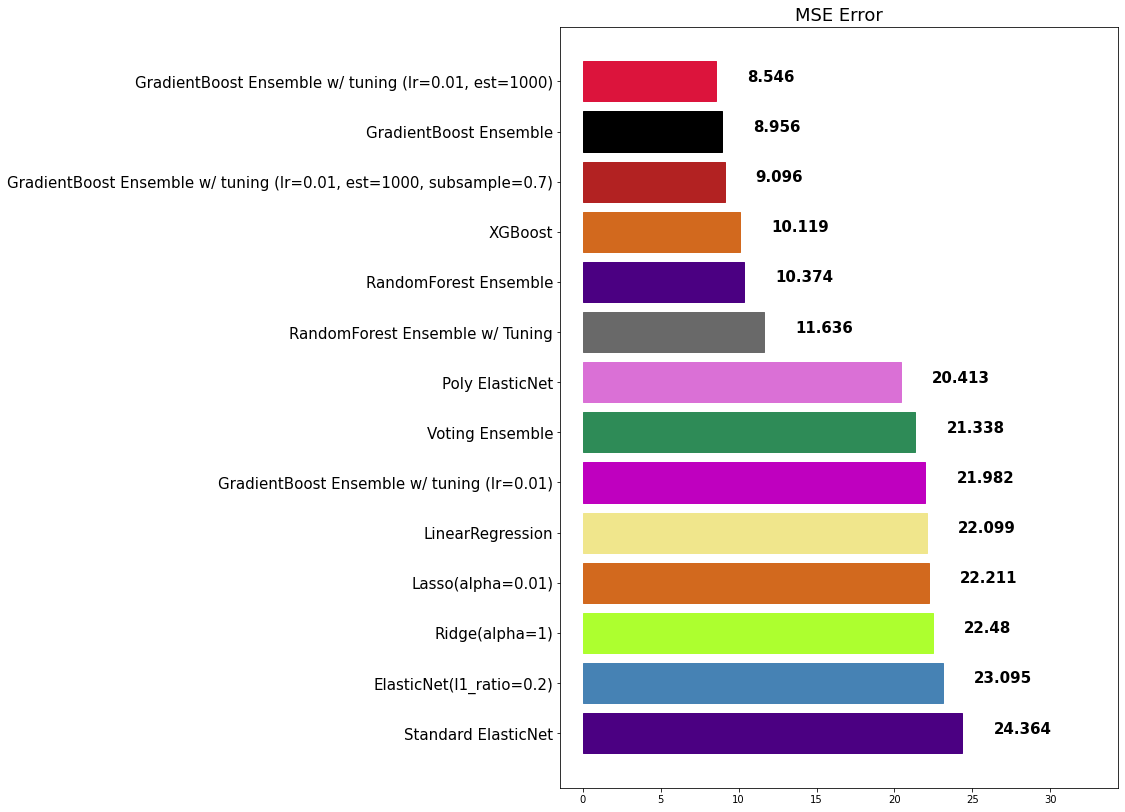

In [45]:
xgb_pred=xgb.predict(x_test)
mse_eval('XGBoost', y_test, xgb_pred)

**주요 Hyper-parameter**

* **random_state**: random seed 고정값
* **n_jobs**: CPU 사용 개수
* **learning_rate**: 학습률. 너무 큰 학습률은 성능을 떨어뜨리고, 너무 작은 학습률은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
* **n_estimators**: 부스팅 스테이지 수. (랜덤포레스트 트리의 개수 설정과 비슷한 개념). default=100
* **max_depth**: 트리의 깊이. 과대적합 방지용. default=3
* ** subsample**: 샘플 사용 비율. 과대적합 방지용. default=1.0
* **max_features**: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0

[02:11:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


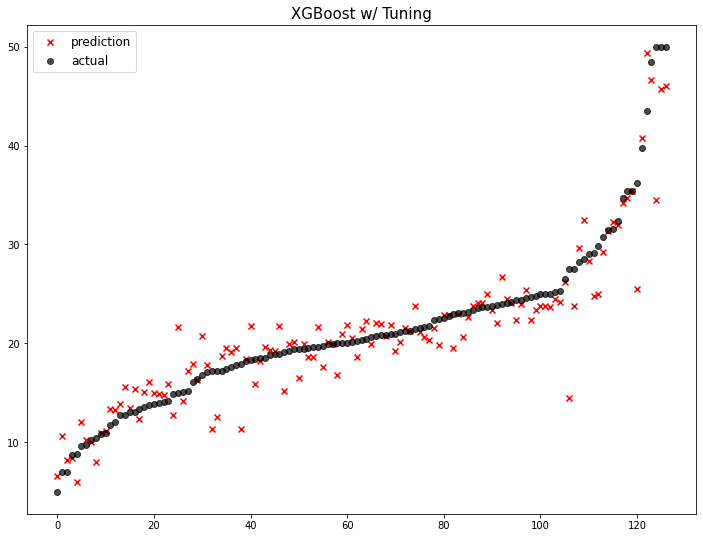

                                                model        mse
0                                 Standard ElasticNet  24.364212
1                            ElasticNet(l1_ratio=0.2)  23.095135
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5          GradientBoost Ensemble w/ tuning (lr=0.01)  21.982151
6                                     Voting Ensemble  21.338016
7                                     Poly ElasticNet  20.413444
8                     RandomForest Ensemble w/ Tuning  11.636012
9                               RandomForest Ensemble  10.374372
10                                            XGBoost  10.118980
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...   9.095856
12                             GradientBoost Ensemble   8.956141
13                                  XGBoost w/ Tuning   8.594185
14  GradientBoost Ensembl

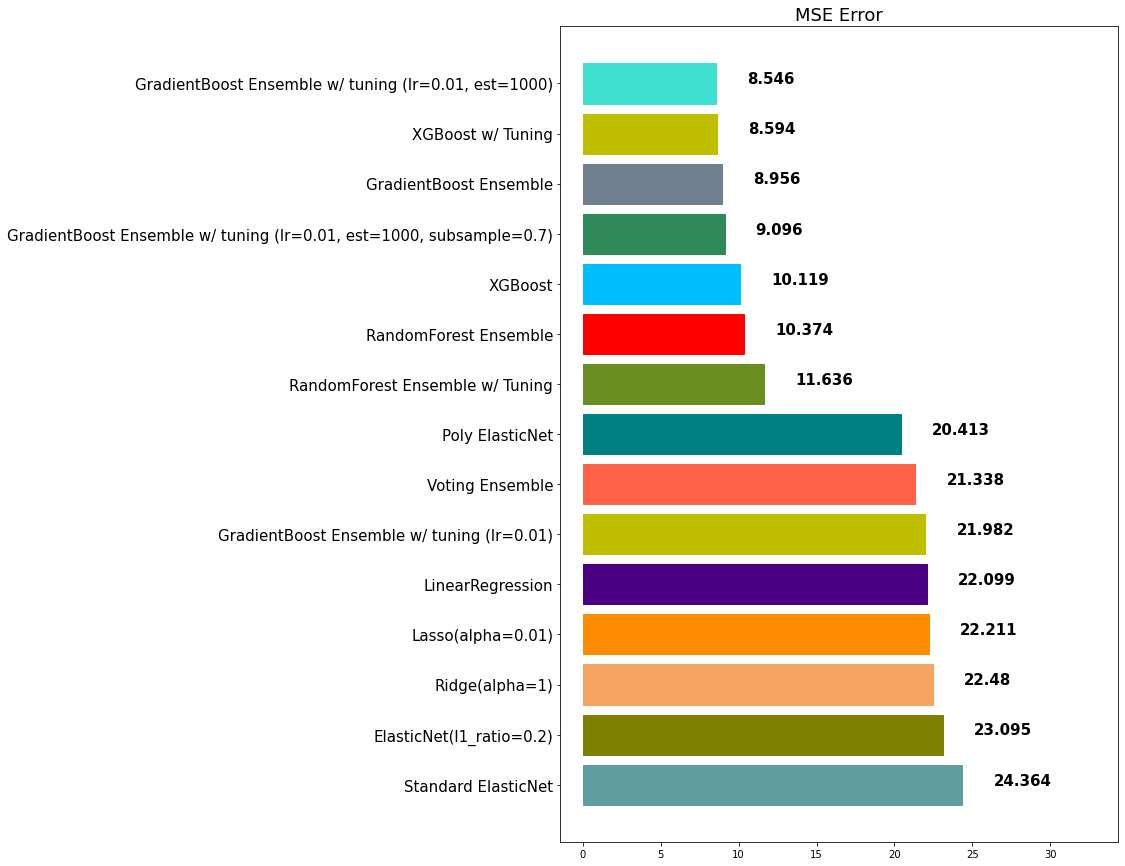

In [46]:
# with hyper-parameter tuning
xgb_t=XGBRegressor(random_state=42, learning_rate=0.01,n_estimators=1000,subsample=0.7,max_features=0.8,max_depth=7)
xgb_t.fit(x_train,y_train)
xgb_t_pred=xgb_t.predict(x_test)
mse_eval('XGBoost w/ Tuning', y_test, xgb_t_pred)

### **4-3-3. LightGBM**

**주요 특징**

    * scikit-learn 패키지가 아님.
    * 성능이 우수함.
    * 속도도 매우 빠름.

In [47]:
from lightgbm import LGBMRegressor, LGBMClassifier

In [48]:
# default value로 학습
lgbm=LGBMRegressor(random_state=42)
lgbm.fit(x_train,y_train)

LGBMRegressor(random_state=42)

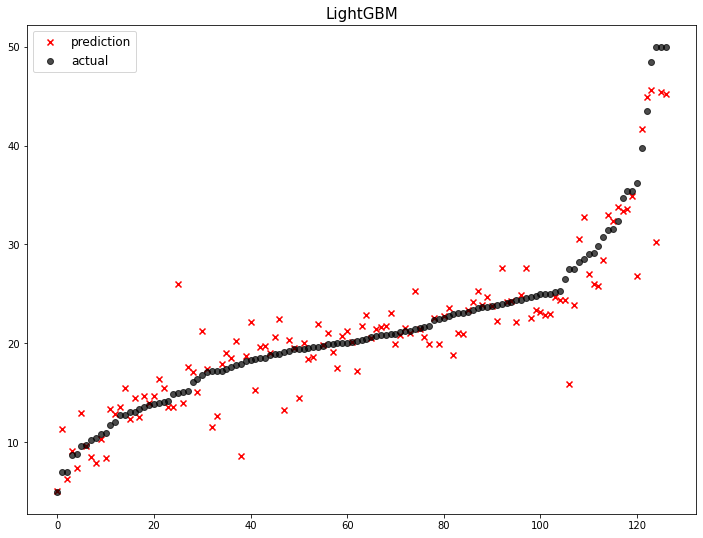

                                                model        mse
0                                 Standard ElasticNet  24.364212
1                            ElasticNet(l1_ratio=0.2)  23.095135
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5          GradientBoost Ensemble w/ tuning (lr=0.01)  21.982151
6                                     Voting Ensemble  21.338016
7                                     Poly ElasticNet  20.413444
8                     RandomForest Ensemble w/ Tuning  11.636012
9                                            LightGBM  10.937726
10                              RandomForest Ensemble  10.374372
11                                            XGBoost  10.118980
12  GradientBoost Ensemble w/ tuning (lr=0.01, est...   9.095856
13                             GradientBoost Ensemble   8.956141
14                       

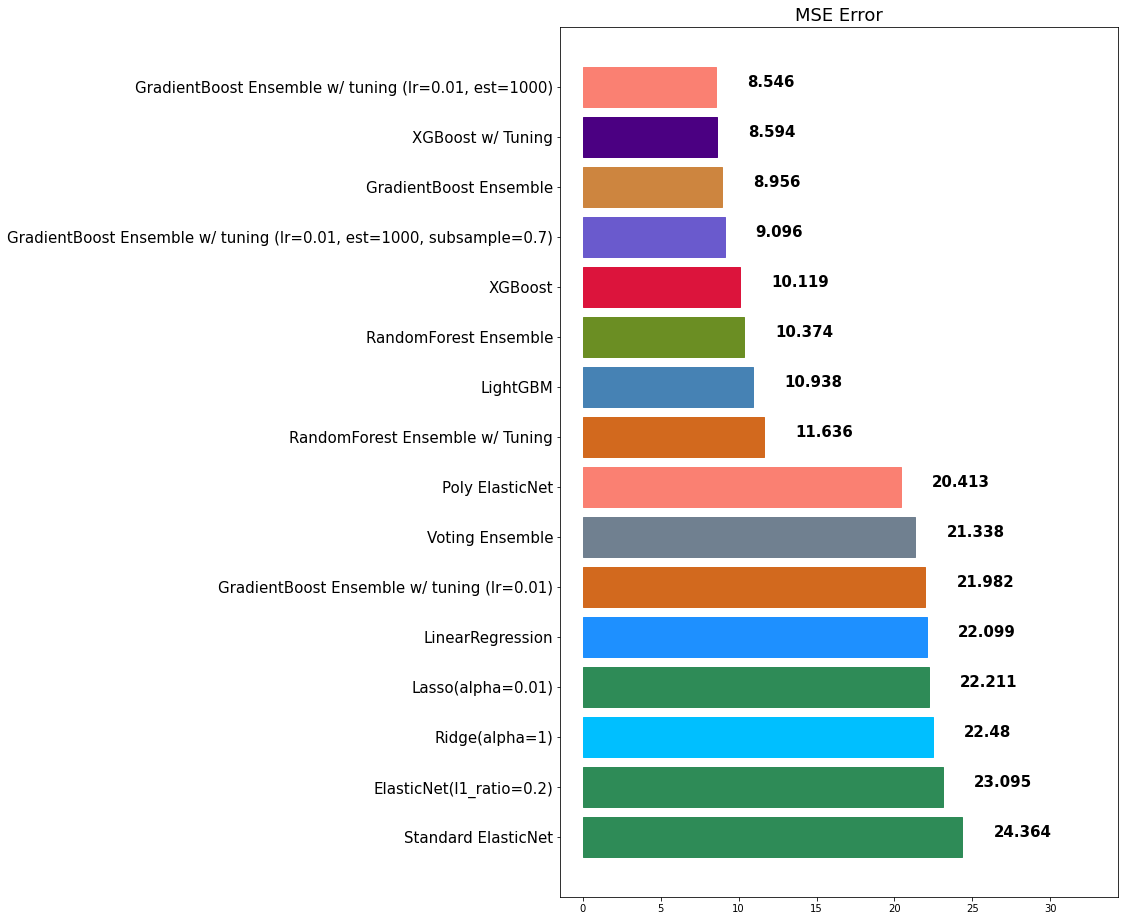

In [49]:
lgbm_pred=lgbm.predict(x_test)
mse_eval('LightGBM',y_test,lgbm_pred)

**주요 Hyper-parameter**


* **random_state**: random seed 고정 값

* **n_jobs**: CPU 사용 갯수

* **learning_rate**: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1

* **n_estimators**: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100

* **max_depth**: 트리의 깊이. 과대적합 방지용. default=3.

* **colsample_bytree**: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0


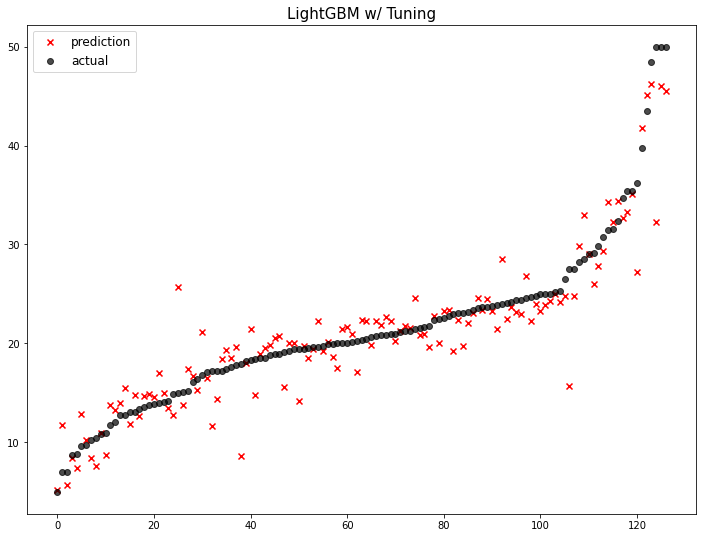

                                                model        mse
0                                 Standard ElasticNet  24.364212
1                            ElasticNet(l1_ratio=0.2)  23.095135
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5          GradientBoost Ensemble w/ tuning (lr=0.01)  21.982151
6                                     Voting Ensemble  21.338016
7                                     Poly ElasticNet  20.413444
8                     RandomForest Ensemble w/ Tuning  11.636012
9                                            LightGBM  10.937726
10                              RandomForest Ensemble  10.374372
11                                            XGBoost  10.118980
12                                 LightGBM w/ Tuning   9.815374
13  GradientBoost Ensemble w/ tuning (lr=0.01, est...   9.095856
14                       

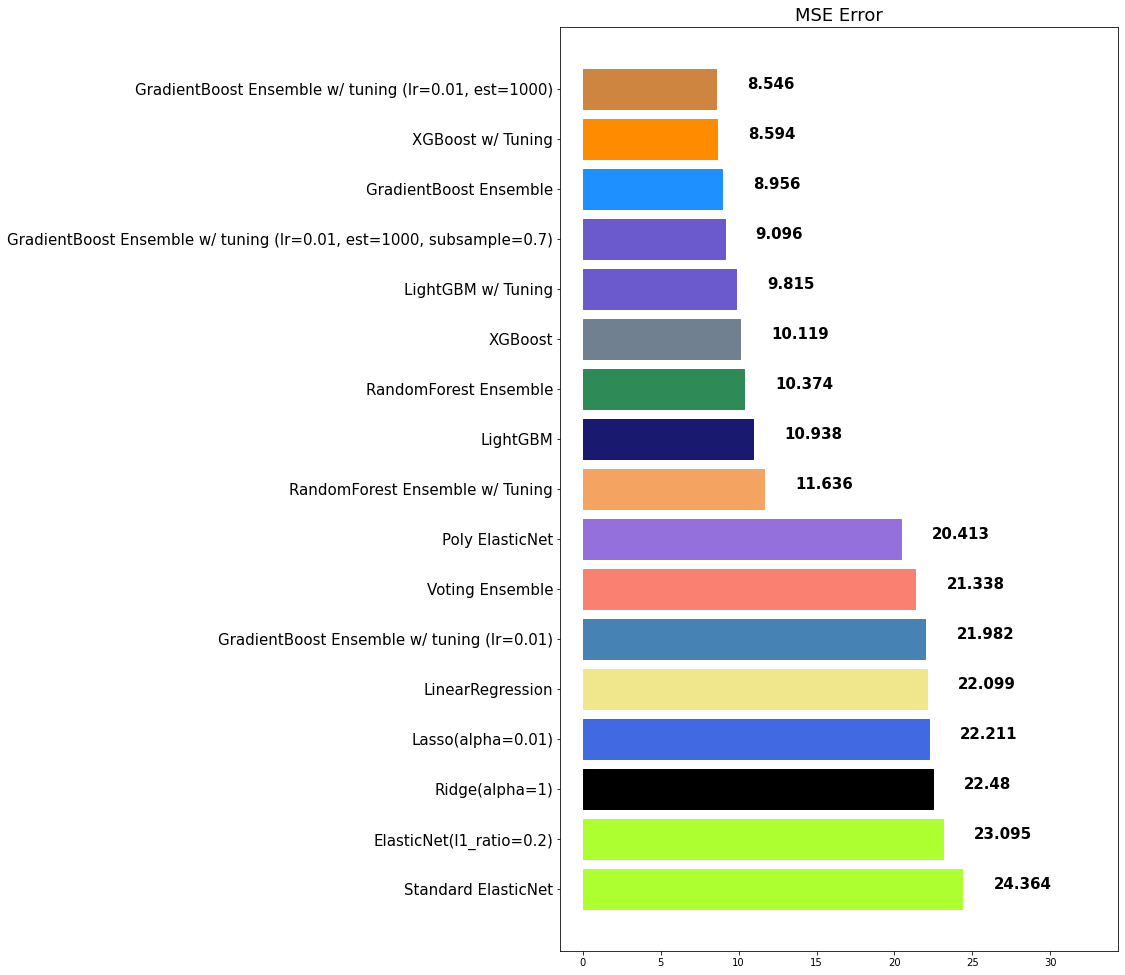

In [50]:
# with hyper-parameter tuning
lgbm_t=LGBMRegressor(random_state=42,learning_rate=0.01,n_estimators=2000,colsample_bytree=0.9, subsample=0.7,max_depth=5)
lgbm_t.fit(x_train,y_train)
lgbm_t_pred=lgbm_t.predict(x_test)
mse_eval('LightGBM w/ Tuning', y_test, lgbm_t_pred)

## **4-4. 스태킹(Stacking)**

개별 모델이 예측한 데이터를 기반으로 final_estimators 종합하여 예측을 수행

    * 성능을 극으로 끓어올릴 때 활용
    * 과대적합을 유발할 수 있다. (특히, 데이터셋이 적은 경우)

In [51]:
from sklearn.ensemble import StackingRegressor

In [52]:
stack_models={
    ('elasticnet',poly_elasticnet),
    ('randomforest',rfr_t),
    ('lgbm',lgbm_t)
}

[02:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


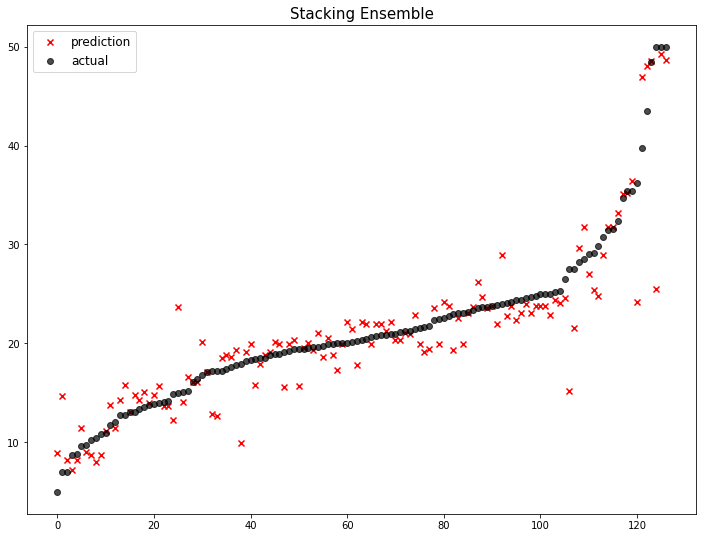

                                                model        mse
0                                 Standard ElasticNet  24.364212
1                            ElasticNet(l1_ratio=0.2)  23.095135
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5          GradientBoost Ensemble w/ tuning (lr=0.01)  21.982151
6                                     Voting Ensemble  21.338016
7                                     Poly ElasticNet  20.413444
8                                   Stacking Ensemble  12.486424
9                     RandomForest Ensemble w/ Tuning  11.636012
10                                           LightGBM  10.937726
11                              RandomForest Ensemble  10.374372
12                                            XGBoost  10.118980
13                                 LightGBM w/ Tuning   9.815374
14  GradientBoost Ensembl

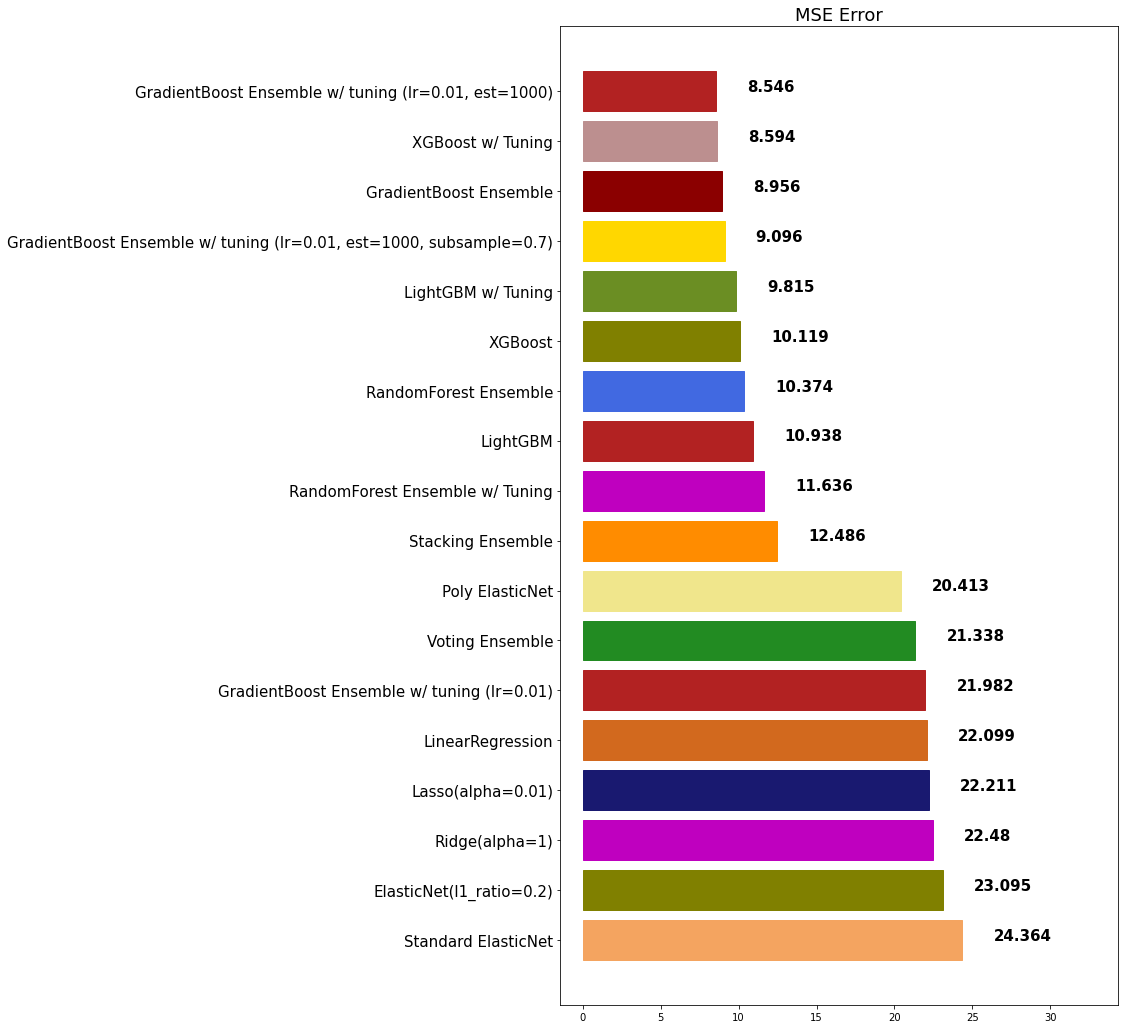

In [53]:
stack_reg=StackingRegressor(stack_models,final_estimator=xgb,n_jobs=-1)
stack_reg.fit(x_train,y_train)
stack_reg_pred=stack_reg.predict(x_test)
mse_eval('Stacking Ensemble', y_test,stack_reg_pred)

## **4-5. Weighted Blending**

각 모델의 예측값에 대하여 weight를 곱하여 최종 output 산출

    * 모델에 대한 가중치를 조절하여, 최종 output 산출
    * 가중치의 합은 1.0이 되도록 설정

In [54]:
final_outputs={
    # 'randomforest': rfr_t_pred,
    'xgboost': xgb_t_pred,
    'lgbm': lgbm_t_pred,
    'gbr': gbr_t3_pred
}

In [55]:
final_prediction=\
final_outputs['xgboost']*0.4\
+final_outputs['lgbm']*0.2\
+final_outputs['gbr']*0.4\

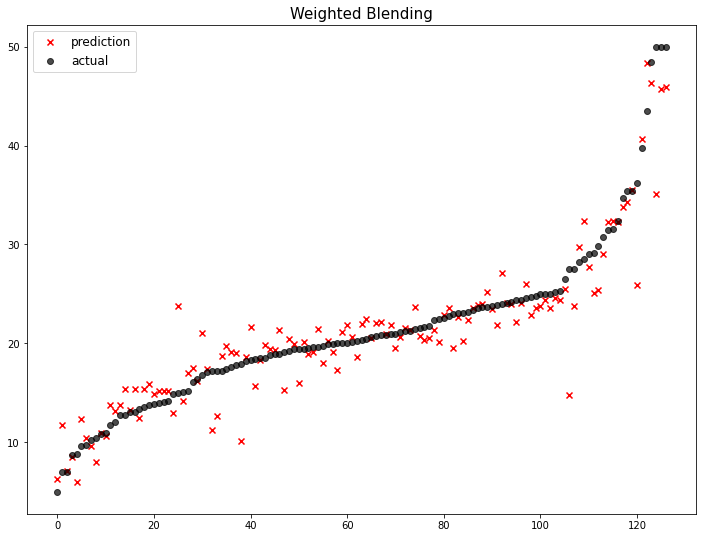

                                                model        mse
0                                 Standard ElasticNet  24.364212
1                            ElasticNet(l1_ratio=0.2)  23.095135
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5          GradientBoost Ensemble w/ tuning (lr=0.01)  21.982151
6                                     Voting Ensemble  21.338016
7                                     Poly ElasticNet  20.413444
8                                   Stacking Ensemble  12.486424
9                     RandomForest Ensemble w/ Tuning  11.636012
10                                           LightGBM  10.937726
11                              RandomForest Ensemble  10.374372
12                                            XGBoost  10.118980
13                                 LightGBM w/ Tuning   9.815374
14  GradientBoost Ensembl

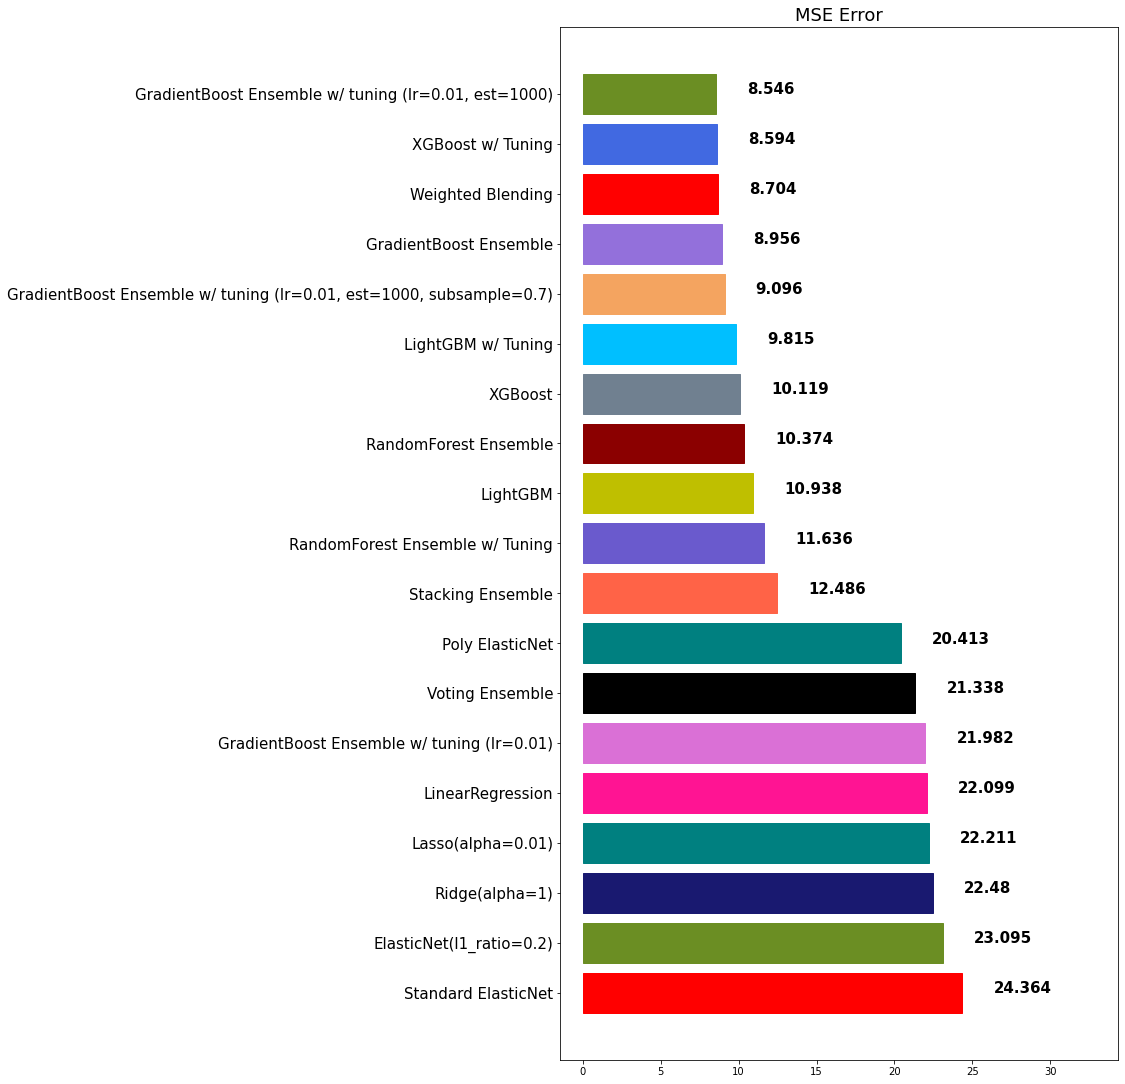

In [56]:
mse_eval('Weighted Blending', y_test, final_prediction)

## **4-6. 앙상블 모델 정리**

1. 앙상블은 대체적으로 단일 모델 대비 성능이 좋다.
2. 앙상블은 앙상블하는 기법인 Stacking과 Weighted Blending도 참고해볼만 하다.
3. 앙상블 모델은 적절한 **Hyper-parameter Tuning이 중요하다.
4. 앙상블 모델은 대체적으로 학습시간이 더 오래 걸린다.
5. 따라서, 모델 튜닝을 하는 데에 시간이 오래 소유된다.

# **5. Cross Validation**
## **5-1. Cross Validation 소개**


전에 진행했던 실습에서도 보였듯이, Hyper-parameter의 값은 모델의 성능을 좌우한다. 그러므로 예측모델의 성능을 높이기 위해, Hyper-parameter Tuning이 매우 중요하다.

    * 이를 실현하기 위해 Training data을 다시 Training set과 Validation set으로 나눈다. Training set에서 Hyper-parameter값을 바꿔 가면서 모델 학습하고, Validation set에서 모델의 성능을 평가하여, 모델 성능을 제일 높일 수 있는 Hyper-parameter값을 선택한다.

    * 하지만, 데이터의 일부만 Validation set으로 사용해 모델 성능을 평가하게 되면, 훈련된 모델이 Test set에 대한 성능 평가의 신뢰성이 떨어질 수 있다. 이를 방지하기 위해 **K-fold Cross Validation (K-겹 교차 검증)**을 많이 활용한다.

        * K겹 교차 검증은 모든 데이터가 최소 한 번은 validation set으로 쓰이도록 한다.
          (아래의 그림을 보면, 데이터를 5개로 쪼개 매번 validation set을 바꿔나가는 것을 볼 수 있다.)
        
        * K번 검증을 통해 구한 K개의 평가지표 값을 평균 내어 모델 성능을 평가한다.

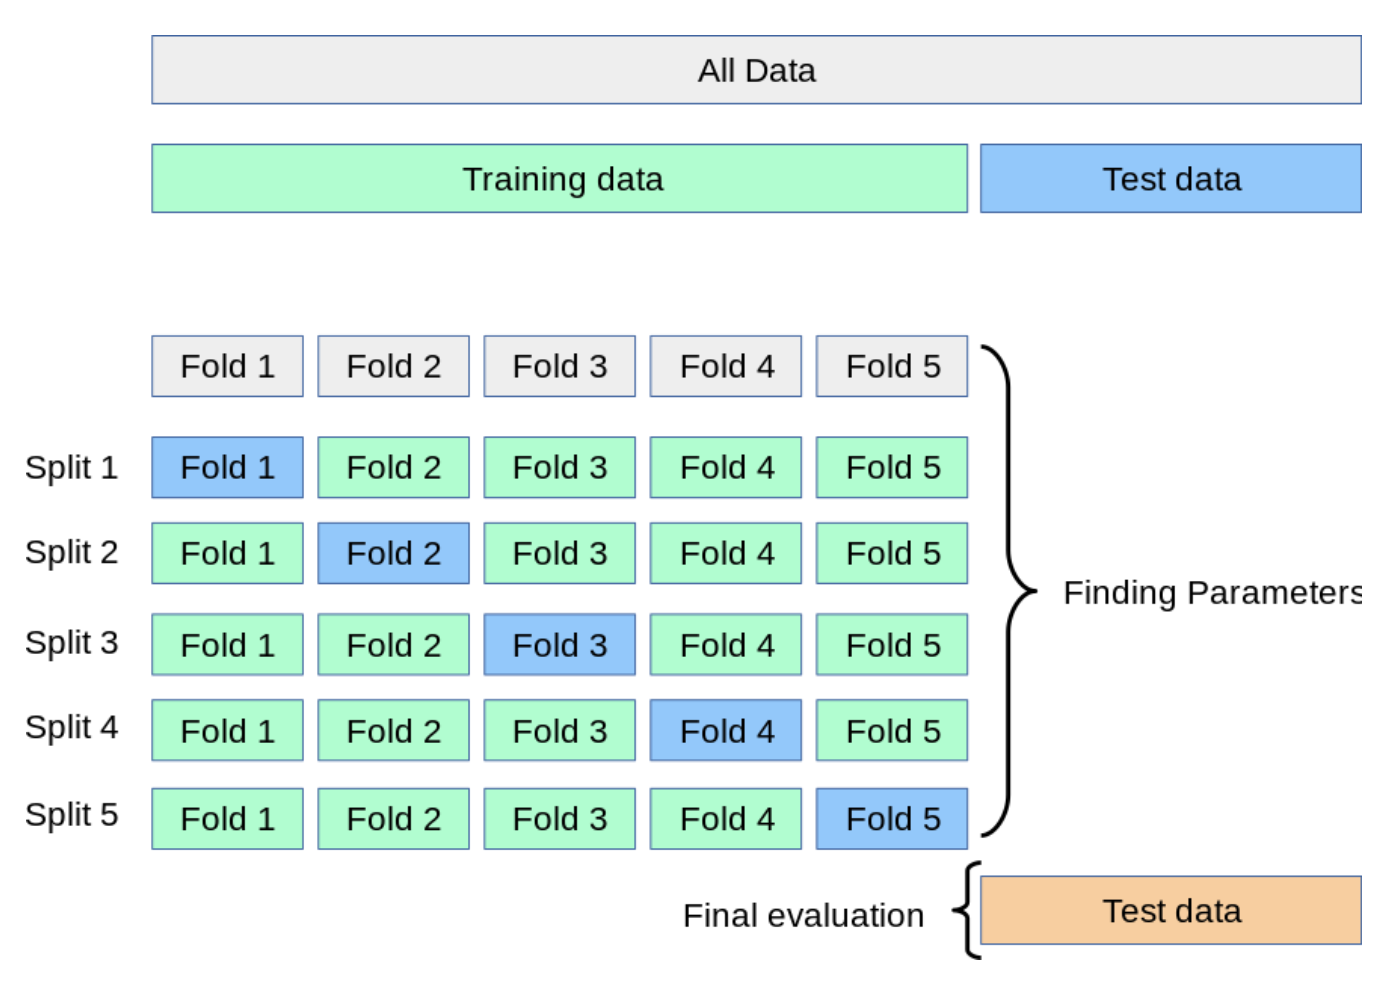

[예시]

    * Estimation 1일 때,
    Training set: [2,3,4,5] / Validation set:[1]

    * Estimation 2일 때,
    Training set: [1,3,4,5] / Validation set:[2]

In [57]:
from sklearn.model_selection import KFold

In [58]:
n_splits=5
kfold=KFold(n_splits=n_splits, random_state=42,shuffle=True)

In [59]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [60]:
X=np.array(df.drop('MEDV',1))
Y=np.array(df['MEDV'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [61]:
lgbm_fold=LGBMRegressor(random_state=42)

In [65]:
i=1
total_error=0
for train_index, test_index in kfold.split(X):
  x_train_fold,x_test_fold=X[train_index],X[test_index]
  y_train_fold,y_test_fold=Y[train_index],Y[test_index]
  lgbm_fold_pred=lgbm_fold.fit(x_train_fold,y_train_fold).predict(x_test_fold)  
  error=mean_squared_error(y_test_fold, lgbm_fold_pred)
  print('Fold={}, prediction score={:.2f}'.format(i,error))
  total_error+=error
  i+=1
print('---'*10)
print('Average Error: %s' %(total_error/n_splits))

Fold=1, prediction score=8.34
Fold=2, prediction score=10.40
Fold=3, prediction score=17.58
Fold=4, prediction score=6.94
Fold=5, prediction score=12.16
------------------------------
Average Error: 11.083201392666322


## **5-2. Hyper-parameter 튜닝**

**hyper-parameter 튜닝** 시 경우의 수가 너무 많으므로 우리는 자동화할 필요가 있다.

sklearn 패키지에서 자주 사용되는 hyper-parameter 튜닝을 돕는 클래스는 다음 2가지가 있다.

    1. RandomizedSearchCV
    2. GridSearchCV

[적용하는 방법]
    
    1. 사용할 Search 방법을 선택한다.
    2. hyper-parameter 도메인(값의 범위)을 설정한다.
    3. 학습을 시킨 후, 기다린다.
    4. 도출된 결과 값을 모델에 적용하고 성능을 비교한다.





### (1) RandomizedSearchCV

    * 모든 매개변수 값이 시도되는 것이 아니라 지정된 분포에서 고정된 수의 매개변수 설정이 샘플링된다.
    * 시도된 매개변수 설정의 수는 n_iter에 의해 제공된다.


[주요 hyper-parameter (LGBM)]

    * random_state: random seed 고정값
    * n_jobs: CPU 사용 갯수
    * learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
    * n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
    * max_depth: 트리의 깊이. 과대적합 방지용. default=3.
    * colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0


In [66]:
params = {
    'learning_rate': [0.005, 0.01, 0.03, 0.05],
    'n_estimators': [500, 1000, 2000, 3000],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0],
}

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
# 조절하여, 총 몇회의 시도를 진행할 것인지 정의한다.
# 횟수가 늘어나면, 더 좋은 parameter를 찾을 확률은 올라가지만, 그만큼 시간이 오래걸린다.

rcv_lgbm = RandomizedSearchCV(LGBMRegressor(), params, random_state=1, cv=5, n_iter=100, scoring='neg_mean_squared_error')

In [69]:
rcv_lgbm.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.005, 0.01, 0.03,
                                                          0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [500, 1000, 2000, 3000],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1, scoring='neg_mean_squared_error')

In [71]:
rcv_lgbm.best_score_

-12.615661633275717

In [72]:
rcv_lgbm.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.03,
 'max_depth': 3,
 'n_estimators': 1000,
 'subsample': 0.7}

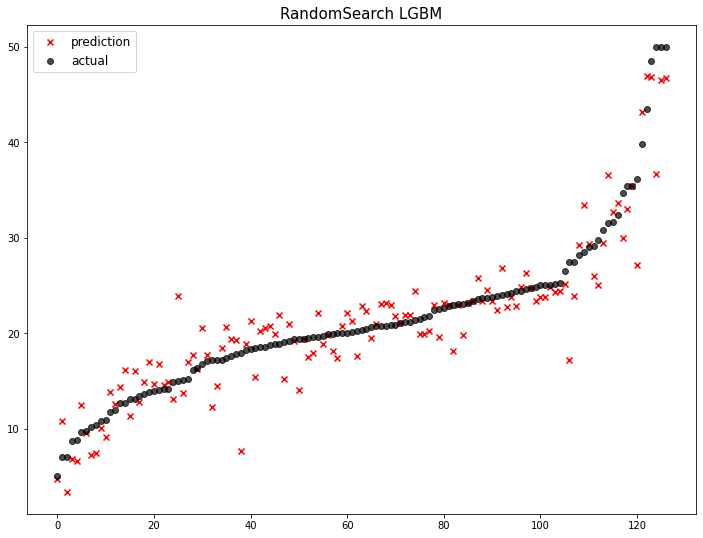

                                                model        mse
0                                 Standard ElasticNet  24.364212
1                            ElasticNet(l1_ratio=0.2)  23.095135
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5          GradientBoost Ensemble w/ tuning (lr=0.01)  21.982151
6                                     Voting Ensemble  21.338016
7                                     Poly ElasticNet  20.413444
8                                   Stacking Ensemble  12.486424
9                     RandomForest Ensemble w/ Tuning  11.636012
10                                           LightGBM  10.937726
11                              RandomForest Ensemble  10.374372
12                                            XGBoost  10.118980
13                                 LightGBM w/ Tuning   9.815374
14                       

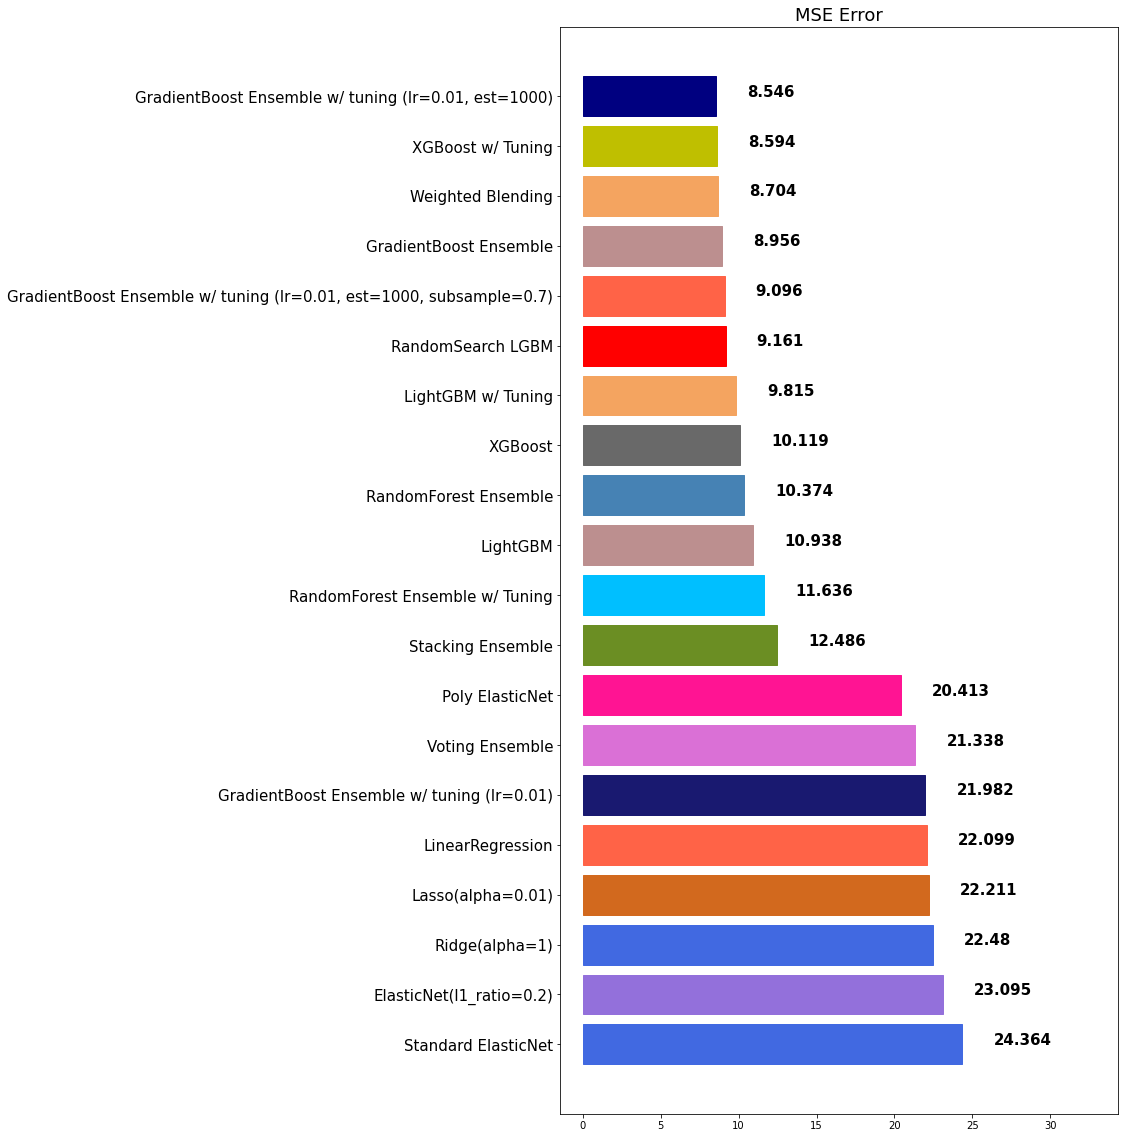

In [73]:
lgbm_best=LGBMRegressor(learning_rate=0.05,n_estimators=1000,subsample=0.8,max_depth=3,colsample_bytree=0.9)
lgbm_best_pred=lgbm_best.fit(x_train,y_train).predict(x_test)
mse_eval('RandomSearch LGBM', y_test,lgbm_best_pred)

### **(2) GridSearchCV**

  * 모든 매개변수 값에 대해 **완전 탐색**을 시도한다.
  * 따라서, 최적화할 parameter가 많다면, **시간이 매우 오래**걸린다.

In [75]:
params={
    'learning_rate':[0.04, 0.05, 0.06],
    'n_estimators': [800, 1000, 1200],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.8, 0.85, 0.9],
    'subsample': [0.8, 0.85, 0.9]
}

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
gs=GridSearchCV(LGBMRegressor(),params,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')

In [79]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.85, 0.9],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [800, 1000, 1200],
                         'subsample': [0.8, 0.85, 0.9]},
             scoring='neg_mean_squared_error')

In [80]:
gs.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.04,
 'max_depth': 4,
 'n_estimators': 800,
 'subsample': 0.8}

In [81]:
lgbm_best=LGBMRegressor(learning_rate=0.04,n_estimators=800,subsample=0.8,max_depth=4,colsample_bytree=0.8)

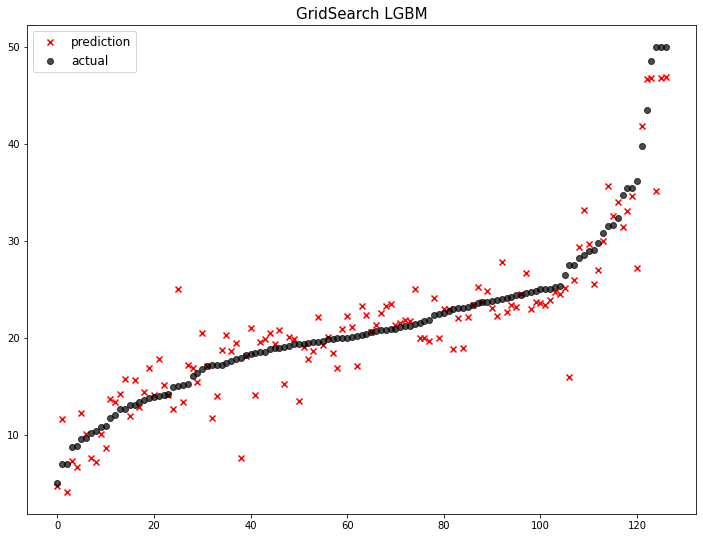

                                                model        mse
0                                 Standard ElasticNet  24.364212
1                            ElasticNet(l1_ratio=0.2)  23.095135
2                                      Ridge(alpha=1)  22.480476
3                                   Lasso(alpha=0.01)  22.210557
4                                    LinearRegression  22.098695
5          GradientBoost Ensemble w/ tuning (lr=0.01)  21.982151
6                                     Voting Ensemble  21.338016
7                                     Poly ElasticNet  20.413444
8                                   Stacking Ensemble  12.486424
9                     RandomForest Ensemble w/ Tuning  11.636012
10                                           LightGBM  10.937726
11                              RandomForest Ensemble  10.374372
12                                            XGBoost  10.118980
13                                 LightGBM w/ Tuning   9.815374
14                       

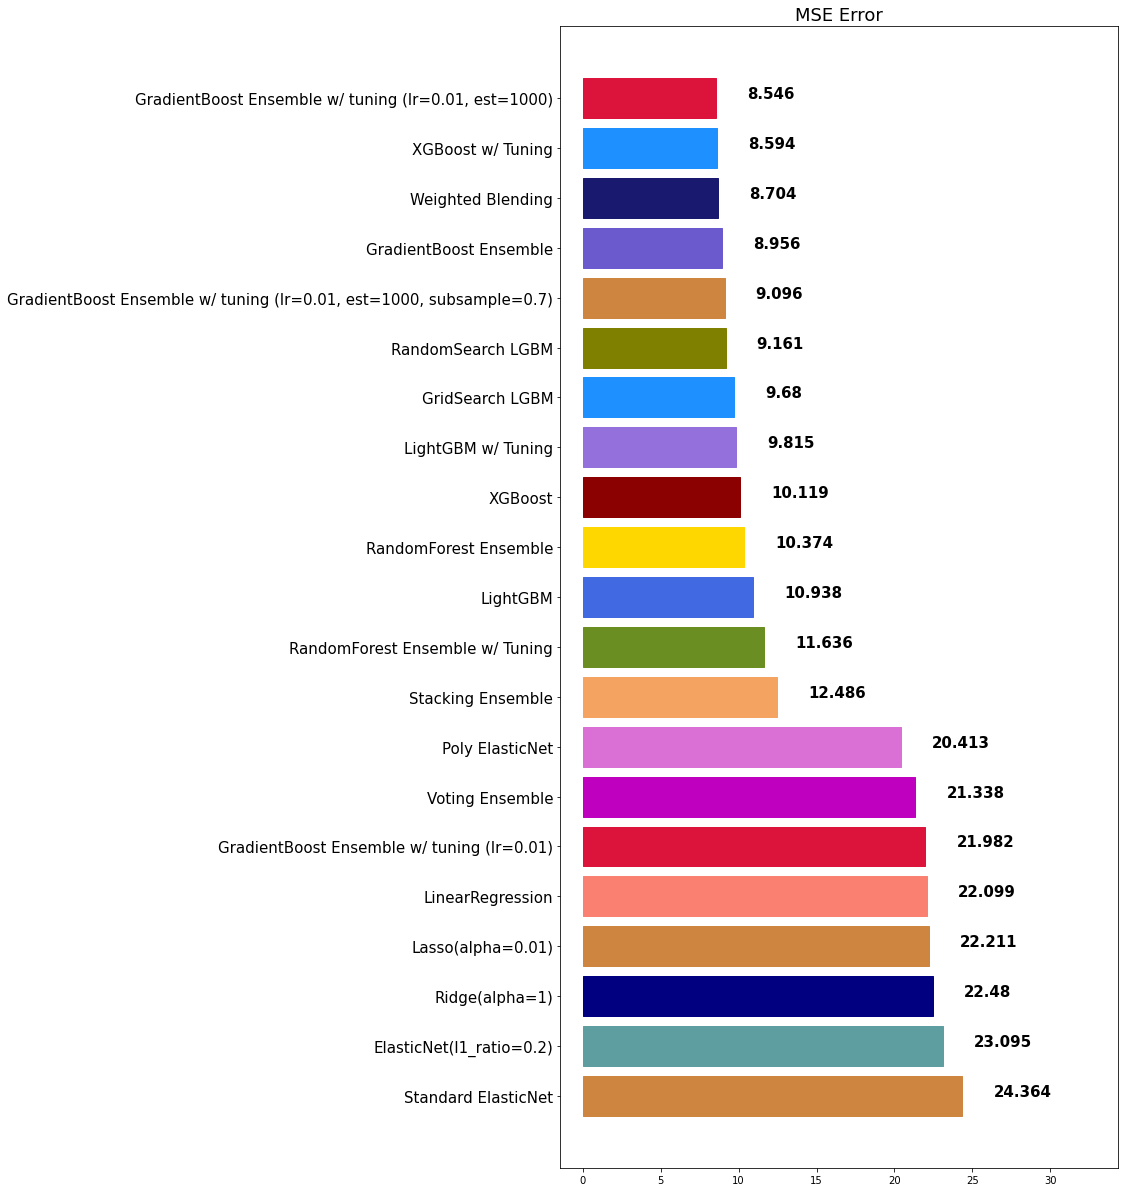

In [82]:
lgbm_best_pred=lgbm_best.fit(x_train,y_train).predict(x_test)
mse_eval('GridSearch LGBM',y_test,lgbm_best_pred)